<a href="https://colab.research.google.com/github/muratgguzel/AIML-DeepLearnig-Introduction-Neural-Networks/blob/main/DNN_LEAD_GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))



/bin/bash: nvidia-smi: command not found
Your runtime has 13.6 gigabytes of available RAM



In [3]:
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')
! pwd

Not using a high-RAM runtime
/content


### Objective

EPAM is willing to dedect past contacts from linked in whom had a period of interaction with EPAM based on different seniority levels.

EPAM willing to increase Leads with reaching out these valuable contacts by using AI functionality.

DATA DICTIONARY

 0    LeadGen

 1   LinkedIn_Profile

 2   LinkedIn_Follower_Count

 3   Linkedin_Connection_Count

 4   Full_Name

 5   Searched_Email

 6   Previous_Seniority_Level

 7   Current_Seniority_Level

 8   Previous_Company

 9   Previous_Company_Size

 10  Previous_Company_Industry_EPAM

 11  Previous_Company_Employess_On_Linkedin

 12  Previous_Company_Followers

 13  Previous_Company_Parent_Cmp_exist

 14  Previous_Company_Forbes

 15  Previous_Company_Average_NPS

 16  Communication_intensity

 17  Engagement_Duration_Epam

 18  Engegement_Cnt_Epam

 19  First_engagement_year

 20  Seniority_Level_Of_Epam

 21  Engegement_Cnt_Epam_C_track

 22  Engegement_Cnt_Epam_C_track_CommIntens

 23  Current_Company

 24  Current_Company_Size

 25  Current_Company_Employess_On_Linkedin

 26  Current_Company_Followers

 27  Current_Company_Tier

 28  Current_Company_Parent_Cmp_exist

 29  Current_Company_Industry_EPAM

 30  Current_Company_Rev

 31  Current_Company_Forbes


## 1-LOADING LIBRARIES

In [4]:
!pip install nb_black

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
!pip install tensorflow

In [6]:
## Install Keras Tuner
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [7]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
import sklearn
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

##2-LOADING AND EXPLORING DATA

In [9]:
Row_Data = pd.read_csv("https://raw.githubusercontent.com/SergeyKrupeninEPAM/LeadGenAIEngine/master/Release_4_Generated_test_06-26-2023.csv?token=GHSAT0AAAAAACCSWB7M63XPSVR3ZUHUKQ4OZFRFJCQ",encoding='utf-8',dtype="str")

In [10]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

In [11]:
data.columns

Index(['LeadGen', 'LinkedIn_Profile', 'LinkedIn_Follower_Count',
       'Linkedin_Connection_Count', 'Full_Name', 'Searched_Email',
       'Previous_Seniority_Level', 'Current_Seniority_Level',
       'Previous_Company', 'Previous_Company_Size',
       'Previous_Company_Industry_EPAM',
       'Previous_Company_Employess_On_Linkedin', 'Previous_Company_Followers',
       'Previous_Company_Parent_Cmp_exist', 'Previous_Company_Forbes',
       'Previous_Company_Average_NPS', 'Communication_intensity',
       'Engagement_Duration_Epam', 'Engegement_Cnt_Epam',
       'First_engagement_year', 'Seniority_Level_Of_Epam',
       'Engegement_Cnt_Epam_C_track', 'Engegement_Cnt_Epam_C_track_CommIntens',
       'Current_Company', 'Current_Company_Size',
       'Current_Company_Employess_On_Linkedin', 'Current_Company_Followers',
       'Current_Company_Tier', 'Current_Company_Parent_Cmp_exist',
       'Current_Company_Industry_EPAM', 'Current_Company_Rev',
       'Current_Company_Forbes'],
      dty

In [12]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1356 rows and 32 columns.


In [13]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Previous_Company_Average_NPS              0.084071
Current_Company_Employess_On_Linkedin     0.046460
Linkedin_Connection_Count                 0.037611
LinkedIn_Follower_Count                   0.036873
Engegement_Cnt_Epam_C_track_CommIntens    0.028024
Engegement_Cnt_Epam_C_track               0.028024
First_engagement_year                     0.028024
Engegement_Cnt_Epam                       0.028024
Engagement_Duration_Epam                  0.028024
Communication_intensity                   0.028024
Current_Company_Industry_EPAM             0.021386
Current_Company_Followers                 0.019174
Current_Company_Rev                       0.016962
Previous_Company_Employess_On_Linkedin    0.015487
Current_Company_Tier                      0.005900
Previous_Company_Followers                0.002212
Previous_Company_Industry_EPAM            0.002212
dtype: float64

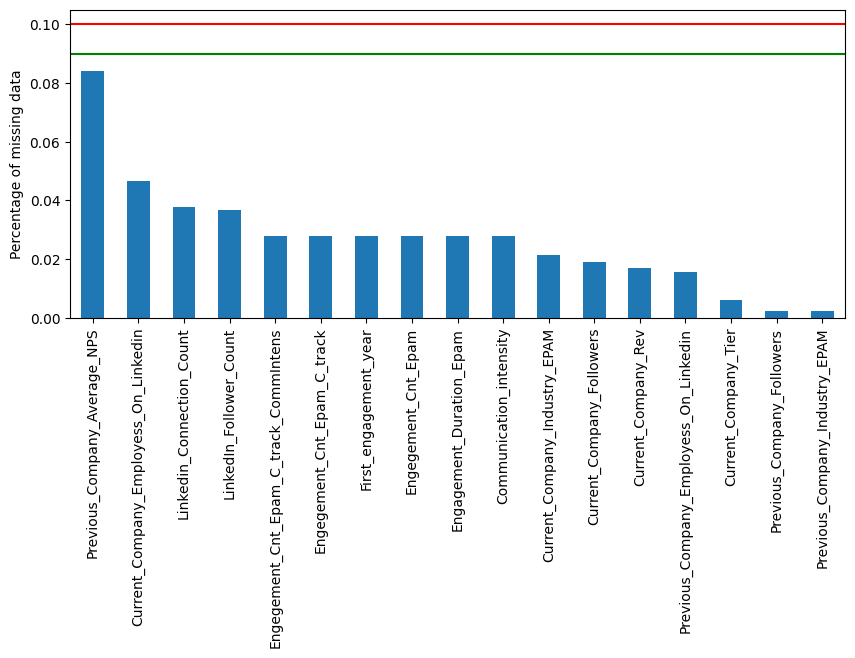

In [14]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.axhline(y=0.09, color='g', linestyle='-')

plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   LeadGen                                 1356 non-null   object
 1   LinkedIn_Profile                        1356 non-null   object
 2   LinkedIn_Follower_Count                 1306 non-null   object
 3   Linkedin_Connection_Count               1305 non-null   object
 4   Full_Name                               1356 non-null   object
 5   Searched_Email                          1356 non-null   object
 6   Previous_Seniority_Level                1356 non-null   object
 7   Current_Seniority_Level                 1356 non-null   object
 8   Previous_Company                        1356 non-null   object
 9   Previous_Company_Size                   1356 non-null   object
 10  Previous_Company_Industry_EPAM          1353 non-null   object
 11  Prev

In [16]:
data.isnull().sum()

LeadGen                                     0
LinkedIn_Profile                            0
LinkedIn_Follower_Count                    50
Linkedin_Connection_Count                  51
Full_Name                                   0
Searched_Email                              0
Previous_Seniority_Level                    0
Current_Seniority_Level                     0
Previous_Company                            0
Previous_Company_Size                       0
Previous_Company_Industry_EPAM              3
Previous_Company_Employess_On_Linkedin     21
Previous_Company_Followers                  3
Previous_Company_Parent_Cmp_exist           0
Previous_Company_Forbes                     0
Previous_Company_Average_NPS              114
Communication_intensity                    38
Engagement_Duration_Epam                   38
Engegement_Cnt_Epam                        38
First_engagement_year                      38
Seniority_Level_Of_Epam                     0
Engegement_Cnt_Epam_C_track       

In [17]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    1084
1     151
2      48
6      31
3      21
7      11
5       6
4       4
dtype: int64

In [18]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [19]:
print(data.LeadGen.value_counts())
print(data.LinkedIn_Profile.value_counts())
print(data.LinkedIn_Follower_Count.value_counts())
print(data.Linkedin_Connection_Count.value_counts())
print(data.Full_Name.value_counts())
print(data.Searched_Email.value_counts())
print(data.Previous_Seniority_Level.value_counts())
print(data.Current_Seniority_Level.value_counts())
print(data.Previous_Company.value_counts())
print(data.Previous_Company_Size.value_counts())
print(data.Previous_Company_Industry_EPAM.value_counts())
print(data.Previous_Company_Employess_On_Linkedin.value_counts())
print(data.Previous_Company_Followers.value_counts())
print(data.Previous_Company_Parent_Cmp_exist.value_counts())
print(data.Previous_Company_Forbes.value_counts())
print(data.Previous_Company_Average_NPS.value_counts())
print(data.Communication_intensity.value_counts())
print(data.Engagement_Duration_Epam.value_counts())
print(data.Engegement_Cnt_Epam.value_counts())
print(data.First_engagement_year.value_counts())
print(data.Seniority_Level_Of_Epam.value_counts())
print(data.Engegement_Cnt_Epam_C_track.value_counts())
print(data.Engegement_Cnt_Epam_C_track_CommIntens.value_counts())
print(data.Current_Company.value_counts())
print(data.Current_Company_Size.value_counts())
print(data.Current_Company_Employess_On_Linkedin.value_counts())
print(data.Current_Company_Followers.value_counts())
print(data.Current_Company_Tier.value_counts())
print(data.Current_Company_Parent_Cmp_exist.value_counts())
print(data.Current_Company_Industry_EPAM.value_counts())
print(data.Current_Company_Rev.value_counts())
print(data.Current_Company_Forbes.value_counts())

0    840
1    516
Name: LeadGen, dtype: int64
https://www.linkedin.com/in/bajjarapu                      1
https://www.linkedin.com/in/shakeel-sorathia-62932a6/      1
https://www.linkedin.com/in/melynda-bissmeyer-b8609123/    1
https://www.linkedin.com/in/alexandra-powell-bba29b74/     1
https://www.linkedin.com/in/joseph-h-5196323/              1
                                                          ..
https://www.linkedin.com/in/munishgupta                    1
https://www.linkedin.com/in/rodney-marable-5766b65         1
https://www.linkedin.com/in/tharney                        1
https://www.linkedin.com/in/mgescheidle                    1
https://www.linkedin.com/in/daliya-asuma-7632046/          1
Name: LinkedIn_Profile, Length: 1356, dtype: int64
915.0      6
647.0      5
319.0      5
349.0      5
608.0      5
          ..
1733.0     1
1132.0     1
1717.0     1
2189.0     1
18573.0    1
Name: LinkedIn_Follower_Count, Length: 955, dtype: int64
468.0      6
190.0      5
612.0 

In [20]:
data["LeadGen"]=data["LeadGen"].astype(int)

In [21]:
data["LinkedIn_Follower_Count"]=data["LinkedIn_Follower_Count"].astype(float)

In [22]:
data["Linkedin_Connection_Count"]=data["Linkedin_Connection_Count"].astype(float)

In [23]:
data["Previous_Company_Employess_On_Linkedin"]=data["Previous_Company_Employess_On_Linkedin"].astype(float)

In [24]:
data["Previous_Company_Followers"]=data["Previous_Company_Followers"].astype(float)

In [25]:
data["Previous_Company_Parent_Cmp_exist"]=data["Previous_Company_Parent_Cmp_exist"].astype(int)

In [26]:
data["Current_Company_Employess_On_Linkedin"]=data["Current_Company_Employess_On_Linkedin"].astype(float)

In [27]:
data["Current_Company_Followers"]=data["Current_Company_Followers"].astype(float)

In [28]:
data["Current_Company_Rev"]=data["Current_Company_Rev"].astype(float)

In [29]:
data["Current_Company_Parent_Cmp_exist"]=data["Current_Company_Parent_Cmp_exist"].astype(int)

In [30]:
data["Engegement_Cnt_Epam"]=data["Engegement_Cnt_Epam"].astype(float)

In [31]:
data["Communication_intensity"]=data["Communication_intensity"].astype(float)

In [32]:
data["Engagement_Duration_Epam"]=data["Engagement_Duration_Epam"].astype(float)

In [33]:
data["Engegement_Cnt_Epam_C_track_CommIntens"]=data["Engegement_Cnt_Epam_C_track_CommIntens"].astype(float)

In [34]:
data["Engegement_Cnt_Epam_C_track"]=data["Engegement_Cnt_Epam_C_track"].astype(float)

In [35]:
data["Previous_Company_Forbes"]=data["Previous_Company_Forbes"].astype(int)

In [36]:
data["Current_Company_Forbes"]=data["Current_Company_Forbes"].astype(int)

In [37]:
data["Previous_Company_Average_NPS"]=data["Previous_Company_Average_NPS"].astype(float)

In [38]:
data["First_engagement_year"]=data["First_engagement_year"].astype(float)

In [39]:
num_cols=data.select_dtypes(include=np.number).columns.tolist()

In [40]:
num_cols

['LeadGen',
 'LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Previous_Company_Parent_Cmp_exist',
 'Previous_Company_Forbes',
 'Previous_Company_Average_NPS',
 'Communication_intensity',
 'Engagement_Duration_Epam',
 'Engegement_Cnt_Epam',
 'First_engagement_year',
 'Engegement_Cnt_Epam_C_track',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Parent_Cmp_exist',
 'Current_Company_Rev',
 'Current_Company_Forbes']

In [41]:
cat_cols = [
"LeadGen",
"Previous_Seniority_Level",
"Current_Seniority_Level",
"Previous_Company_Size",
"Previous_Company_Industry_EPAM",
"Previous_Company_Parent_Cmp_exist",
"Previous_Company_Forbes",
"First_engagement_year",
"Seniority_Level_Of_Epam",
"Current_Company_Size",
"Current_Company_Tier",
"Current_Company_Parent_Cmp_exist",
"Current_Company_Industry_EPAM",
"Current_Company_Forbes",

]
data[cat_cols] = data[cat_cols].astype("category")

##3-DATA PREPROSESSING

In [42]:
data_pre_process=data.copy()

In [43]:
Seniority_Level={"A":3,"B":2,"C":1,"Other":0}

In [44]:

data_pre_process["Previous_Seniority_Level"] = data_pre_process["Previous_Seniority_Level"].map(Seniority_Level)

In [45]:
data_pre_process["Current_Seniority_Level"] = data_pre_process["Current_Seniority_Level"].map(Seniority_Level)

In [46]:
data_pre_process["Seniority_Level_Of_Epam"] = data_pre_process["Seniority_Level_Of_Epam"].map(Seniority_Level)

In [47]:
Size_1=["Other","51-200"]

In [48]:
Size_2=["201-500","501-1000"]

In [49]:
Size_3=["1001-5000","5001-10000","10001+"]

In [50]:
def reduce_company_size(x):
    if x in Size_1:
        return "Size_1"
    elif x in Size_2:
        return "Size_2"
    elif x in Size_3:
        return "Size_3"
    else:
        return x

In [51]:
data_pre_process.Previous_Company_Size=data_pre_process.Previous_Company_Size.apply(reduce_company_size)

In [52]:
data_pre_process.Current_Company_Size=data_pre_process.Current_Company_Size.apply(reduce_company_size)

In [53]:
data_pre_process["Previous_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
1351    Size_3
1352    Size_3
1353    Size_1
1354    Size_1
1355    Size_3
Name: Previous_Company_Size, Length: 1356, dtype: object

In [54]:
data_pre_process["Current_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
1351    Size_3
1352    Size_3
1353    Size_2
1354    Size_1
1355    Size_3
Name: Current_Company_Size, Length: 1356, dtype: object

In [55]:
print(data_pre_process.Previous_Seniority_Level.value_counts())

2    546
1    433
3    311
0     66
Name: Previous_Seniority_Level, dtype: int64


In [56]:
print(data_pre_process.Current_Company_Size.value_counts())

Size_3    751
Size_1    326
Size_2    279
Name: Current_Company_Size, dtype: int64


In [57]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [58]:
data_pre_process["Previous_Company_Industry_EPAM"]

0            FS
1            FS
2            FS
3            FS
4            FS
         ...   
1351    Hi-Tech
1352    Hi-Tech
1353        NaN
1354        NaN
1355      Other
Name: Previous_Company_Industry_EPAM, Length: 1356, dtype: category
Categories (13, object): ['CPG', 'EDU', 'FS', 'HC', ..., 'MFG', 'Oil&Gas/Utilities', 'Other', 'T&H']

In [59]:
def calculate_existence_ratio(data, column):
    value_counts = data[column].value_counts()
    total_count = data[column].count()
    existence_ratio = value_counts / total_count
    return existence_ratio

In [60]:
existence_ratio = calculate_existence_ratio(data_pre_process, "Previous_Company_Industry_EPAM")

In [61]:
existence_ratio

ISV                  0.381375
T&H                  0.176644
CPG                  0.118995
M&E                  0.062823
FS                   0.045824
HC                   0.040650
Hi-Tech              0.036955
MFG                  0.035477
Other                0.035477
LS                   0.033259
EDU                  0.014043
INS                  0.011086
Oil&Gas/Utilities    0.007391
Name: Previous_Company_Industry_EPAM, dtype: float64

In [62]:
existence_ratio = calculate_existence_ratio(data_pre_process, "Current_Company_Industry_EPAM")

In [63]:
existence_ratio

ISV                  0.385833
FS                   0.134891
CPG                  0.076865
HC                   0.068576
Hi-Tech              0.063301
T&H                  0.060286
Other                0.057272
MFG                  0.042200
M&E                  0.032404
LS                   0.029390
INS                  0.028636
EDU                  0.013564
Oil&Gas/Utilities    0.006782
Name: Current_Company_Industry_EPAM, dtype: float64

In [64]:
data_pre_process=data_pre_process.drop(["LinkedIn_Profile"],axis=1)

In [65]:
data_pre_process=data_pre_process.drop(["Full_Name"],axis=1)

In [66]:
data_pre_process=data_pre_process.drop(["Searched_Email"],axis=1)

In [67]:
data_pre_process

,LeadGen,LinkedIn_Follower_Count,Linkedin_Connection_Count,Previous_Seniority_Level,Current_Seniority_Level,Previous_Company,Previous_Company_Size,Previous_Company_Industry_EPAM,Previous_Company_Employess_On_Linkedin,Previous_Company_Followers,Previous_Company_Parent_Cmp_exist,Previous_Company_Forbes,Previous_Company_Average_NPS,Communication_intensity,Engagement_Duration_Epam,Engegement_Cnt_Epam,First_engagement_year,Seniority_Level_Of_Epam,Engegement_Cnt_Epam_C_track,Engegement_Cnt_Epam_C_track_CommIntens,Current_Company,Current_Company_Size,Current_Company_Employess_On_Linkedin,Current_Company_Followers,Current_Company_Tier,Current_Company_Parent_Cmp_exist,Current_Company_Industry_EPAM,Current_Company_Rev,Current_Company_Forbes
0,1,1210.0,1220.0,1,3,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,13.0,1.0,2.0,2019.0,1,1.0,3.0,Shopify,Size_3,16747.0,713684.0,TIER 1,0,ISV,4611.9,1
1,1,642.0,629.0,1,1,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,402.0,1.0,14.0,2019.0,2,0.0,0.0,Centene Corporation,Size_3,28158.0,196232.0,TIER 1,0,HC,74000.0,0
2,1,810.0,808.0,2,2,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,1892.0,2.0,24.0,2020.0,2,0.0,0.0,Floor & Decor,Size_3,5238.0,45063.0,TIER 1,0,CPG,3433.5,0
3,1,3892.0,3899.0,1,1,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,132.0,2.0,7.0,2019.0,2,0.0,0.0,Fiserv,Size_3,33430.0,550327.0,TIER 1,0,ISV,10000.0,1
4,0,741.0,738.0,1,1,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,176.0,1.0,11.0,2019.0,1,1.0,7.0,WestRock Company,Size_3,24260.0,204857.0,TIER 1,0,MFG,18000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1,406.0,407.0,3,3,GlobalFoundries,Size_3,Hi-Tech,12750.0,190904.0,0,1,8.0,22.0,1.0,3.0,2018.0,2,0.0,0.0,Maxim Integrated,Size_3,21673.0,311892.0,TIER 1,1,Hi-Tech,12014.0,0
1352,0,1278.0,1009.0,1,1,GlobalFoundries,Size_3,Hi-Tech,12750.0,190904.0,0,1,8.0,67.0,2.0,3.0,2018.0,2,0.0,0.0,Wolfspeed,Size_3,2047.0,79762.0,TIER 2,0,Hi-Tech,746.2,0
1353,0,339.0,339.0,3,3,Hehmeyer,Size_1,NaN,NaN,NaN,0,0,10.0,60.0,3.0,4.0,2020.0,3,0.0,0.0,Apex Fintech Solutions,Size_2,NaN,1930.0,TIER 3,1,INS,99.2,0
1354,0,18573.0,17510.0,1,1,Hehmeyer,Size_1,NaN,NaN,NaN,0,0,10.0,57.0,1.0,3.0,2021.0,2,0.0,0.0,Warwick Capital Management Ltd.,Size_1,7.0,167.0,TIER 3,0,FS,2.0,0


In [68]:
data_pre_process=data_pre_process.drop(["Previous_Company"],axis=1)

In [69]:
data_pre_process=data_pre_process.drop(["Current_Company"],axis=1)

In [70]:
data_pre_process=data_pre_process.drop(["Current_Company_Parent_Cmp_exist"],axis=1)

In [71]:
data_pre_process=data_pre_process.drop(["Previous_Company_Parent_Cmp_exist"],axis=1)

In [72]:
data_pre_process=data_pre_process.drop(["Previous_Company_Followers"],axis=1)

In [73]:
data_pre_process=data_pre_process.drop(["Previous_Company_Employess_On_Linkedin"],axis=1)

In [74]:
data_pre_process=data_pre_process.drop(["Current_Company_Employess_On_Linkedin"],axis=1)

In [75]:
X=data_pre_process.drop(["LeadGen"], axis=1)

In [76]:
Y=data_pre_process["LeadGen"]

In [77]:
'''# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

SyntaxError: ignored

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,stratify = Y)

In [79]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 1084
Number of rows in test data = 272


**3.2** **Imputing Missing Values**

In [80]:
def impute_missing_with_median(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    data_copy = data.copy()
    data_copy[numeric_columns] = imputer.fit_transform(data_copy[numeric_columns])
    return data_copy

**3.2.1** **Imputing Numerical Values**

In [81]:
round(X_train.isnull().sum() / X_train.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   3.87
Linkedin_Connection_Count                 3.97
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.18
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.67
Communication_intensity                   2.03
Engagement_Duration_Epam                  2.03
Engegement_Cnt_Epam                       2.03
First_engagement_year                     2.03
Seniority_Level_Of_Epam                   0.00
Engegement_Cnt_Epam_C_track               2.03
Engegement_Cnt_Epam_C_track_CommIntens    2.03
Current_Company_Size                      0.00
Current_Company_Followers                 1.66
Current_Company_Tier                      0.46
Current_Company_Industry_EPAM             1.75
Current_Company_Rev                       1.66
Current_Company_Forbes                    0.00
dtype: float6

In [82]:
X_train = impute_missing_with_median(X_train)

In [83]:
round(X_train.isnull().sum() / X_train.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.00
Linkedin_Connection_Count                 0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.18
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              0.00
Communication_intensity                   0.00
Engagement_Duration_Epam                  0.00
Engegement_Cnt_Epam                       0.00
First_engagement_year                     2.03
Seniority_Level_Of_Epam                   0.00
Engegement_Cnt_Epam_C_track               0.00
Engegement_Cnt_Epam_C_track_CommIntens    0.00
Current_Company_Size                      0.00
Current_Company_Followers                 0.00
Current_Company_Tier                      0.46
Current_Company_Industry_EPAM             1.75
Current_Company_Rev                       0.00
Current_Company_Forbes                    0.00
dtype: float6

In [84]:
X_test = impute_missing_with_median(X_test)

In [85]:
round(X_test.isnull().sum() / X_test.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.00
Linkedin_Connection_Count                 0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.37
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              0.00
Communication_intensity                   0.00
Engagement_Duration_Epam                  0.00
Engegement_Cnt_Epam                       0.00
First_engagement_year                     5.88
Seniority_Level_Of_Epam                   0.00
Engegement_Cnt_Epam_C_track               0.00
Engegement_Cnt_Epam_C_track_CommIntens    0.00
Current_Company_Size                      0.00
Current_Company_Followers                 0.00
Current_Company_Tier                      1.10
Current_Company_Industry_EPAM             3.68
Current_Company_Rev                       0.00
Current_Company_Forbes                    0.00
dtype: float6

**3.2.2** **Imputing Categorical Values**

In [86]:
def impute_missing_with_mode(data):
    categorical_columns = data.select_dtypes(include=['category']).columns
    data_copy = data.copy()
    for column in categorical_columns:
        mode = data_copy[column].mode()[0]
        data_copy[column].fillna(mode, inplace=True)
    return data_copy

In [87]:
X_train=impute_missing_with_mode(X_train)

In [88]:
X_test=impute_missing_with_mode(X_test)

In [89]:
round(X_train.isnull().sum() / X_train.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company_Size                     0.0
Previous_Company_Industry_EPAM            0.0
Previous_Company_Forbes                   0.0
Previous_Company_Average_NPS              0.0
Communication_intensity                   0.0
Engagement_Duration_Epam                  0.0
Engegement_Cnt_Epam                       0.0
First_engagement_year                     0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track               0.0
Engegement_Cnt_Epam_C_track_CommIntens    0.0
Current_Company_Size                      0.0
Current_Company_Followers                 0.0
Current_Company_Tier                      0.0
Current_Company_Industry_EPAM             0.0
Current_Company_Rev                       0.0
Current_Company_Forbes                    0.0
dtype: float64

In [90]:
round(X_test.isnull().sum() / X_test.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company_Size                     0.0
Previous_Company_Industry_EPAM            0.0
Previous_Company_Forbes                   0.0
Previous_Company_Average_NPS              0.0
Communication_intensity                   0.0
Engagement_Duration_Epam                  0.0
Engegement_Cnt_Epam                       0.0
First_engagement_year                     0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track               0.0
Engegement_Cnt_Epam_C_track_CommIntens    0.0
Current_Company_Size                      0.0
Current_Company_Followers                 0.0
Current_Company_Tier                      0.0
Current_Company_Industry_EPAM             0.0
Current_Company_Rev                       0.0
Current_Company_Forbes                    0.0
dtype: float64

In [91]:
print("LeadGen ratio in y")
print(Y.value_counts(1))
print("*" * 80)
print("LeadGen value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("LeadGen value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

LeadGen ratio in y
0    0.619469
1    0.380531
Name: LeadGen, dtype: float64
********************************************************************************
LeadGen value ratio in y_train
0    0.619926
1    0.380074
Name: LeadGen, dtype: float64
********************************************************************************
LeadGen value ratio in y_test
0    0.617647
1    0.382353
Name: LeadGen, dtype: float64
********************************************************************************


**3.3** **Feature Enginering**

**3.3.1** **Outlier Treatment On Numerical Columns**

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [94]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [95]:
numerical_col=X_train.select_dtypes(include=np.number).columns.tolist()

**3.3.2** **Outlier Fixing On Training Set**

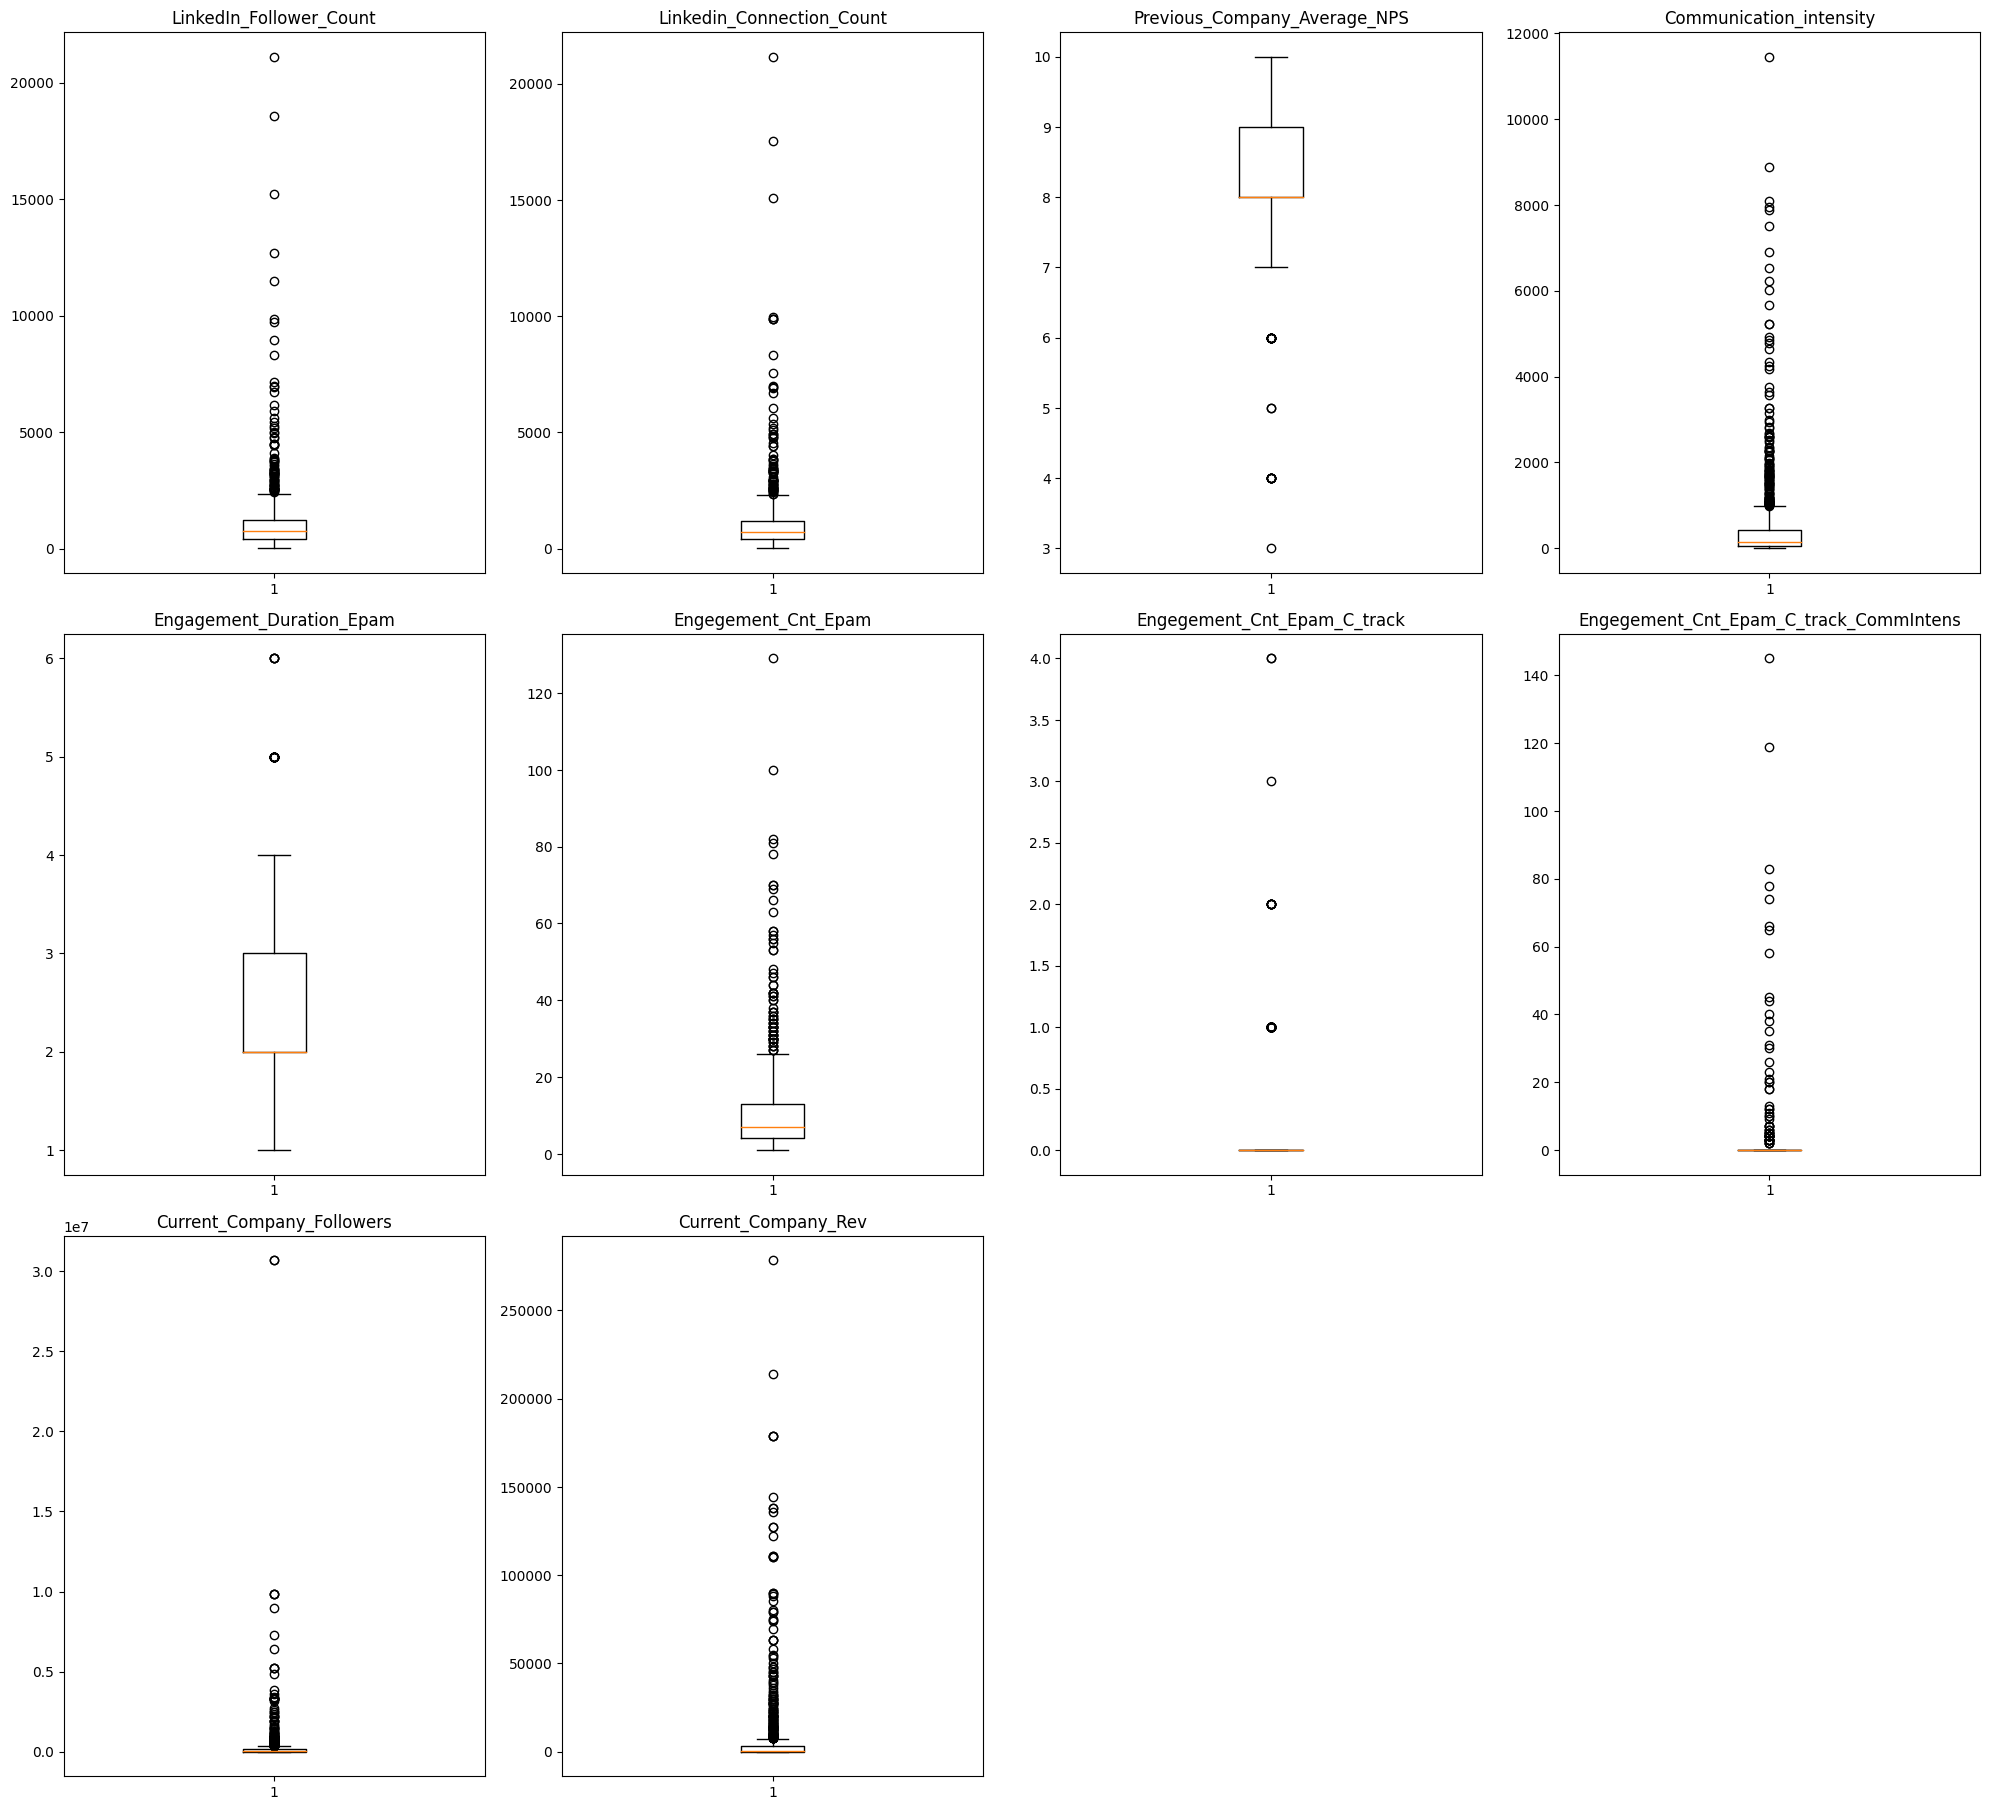

In [96]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

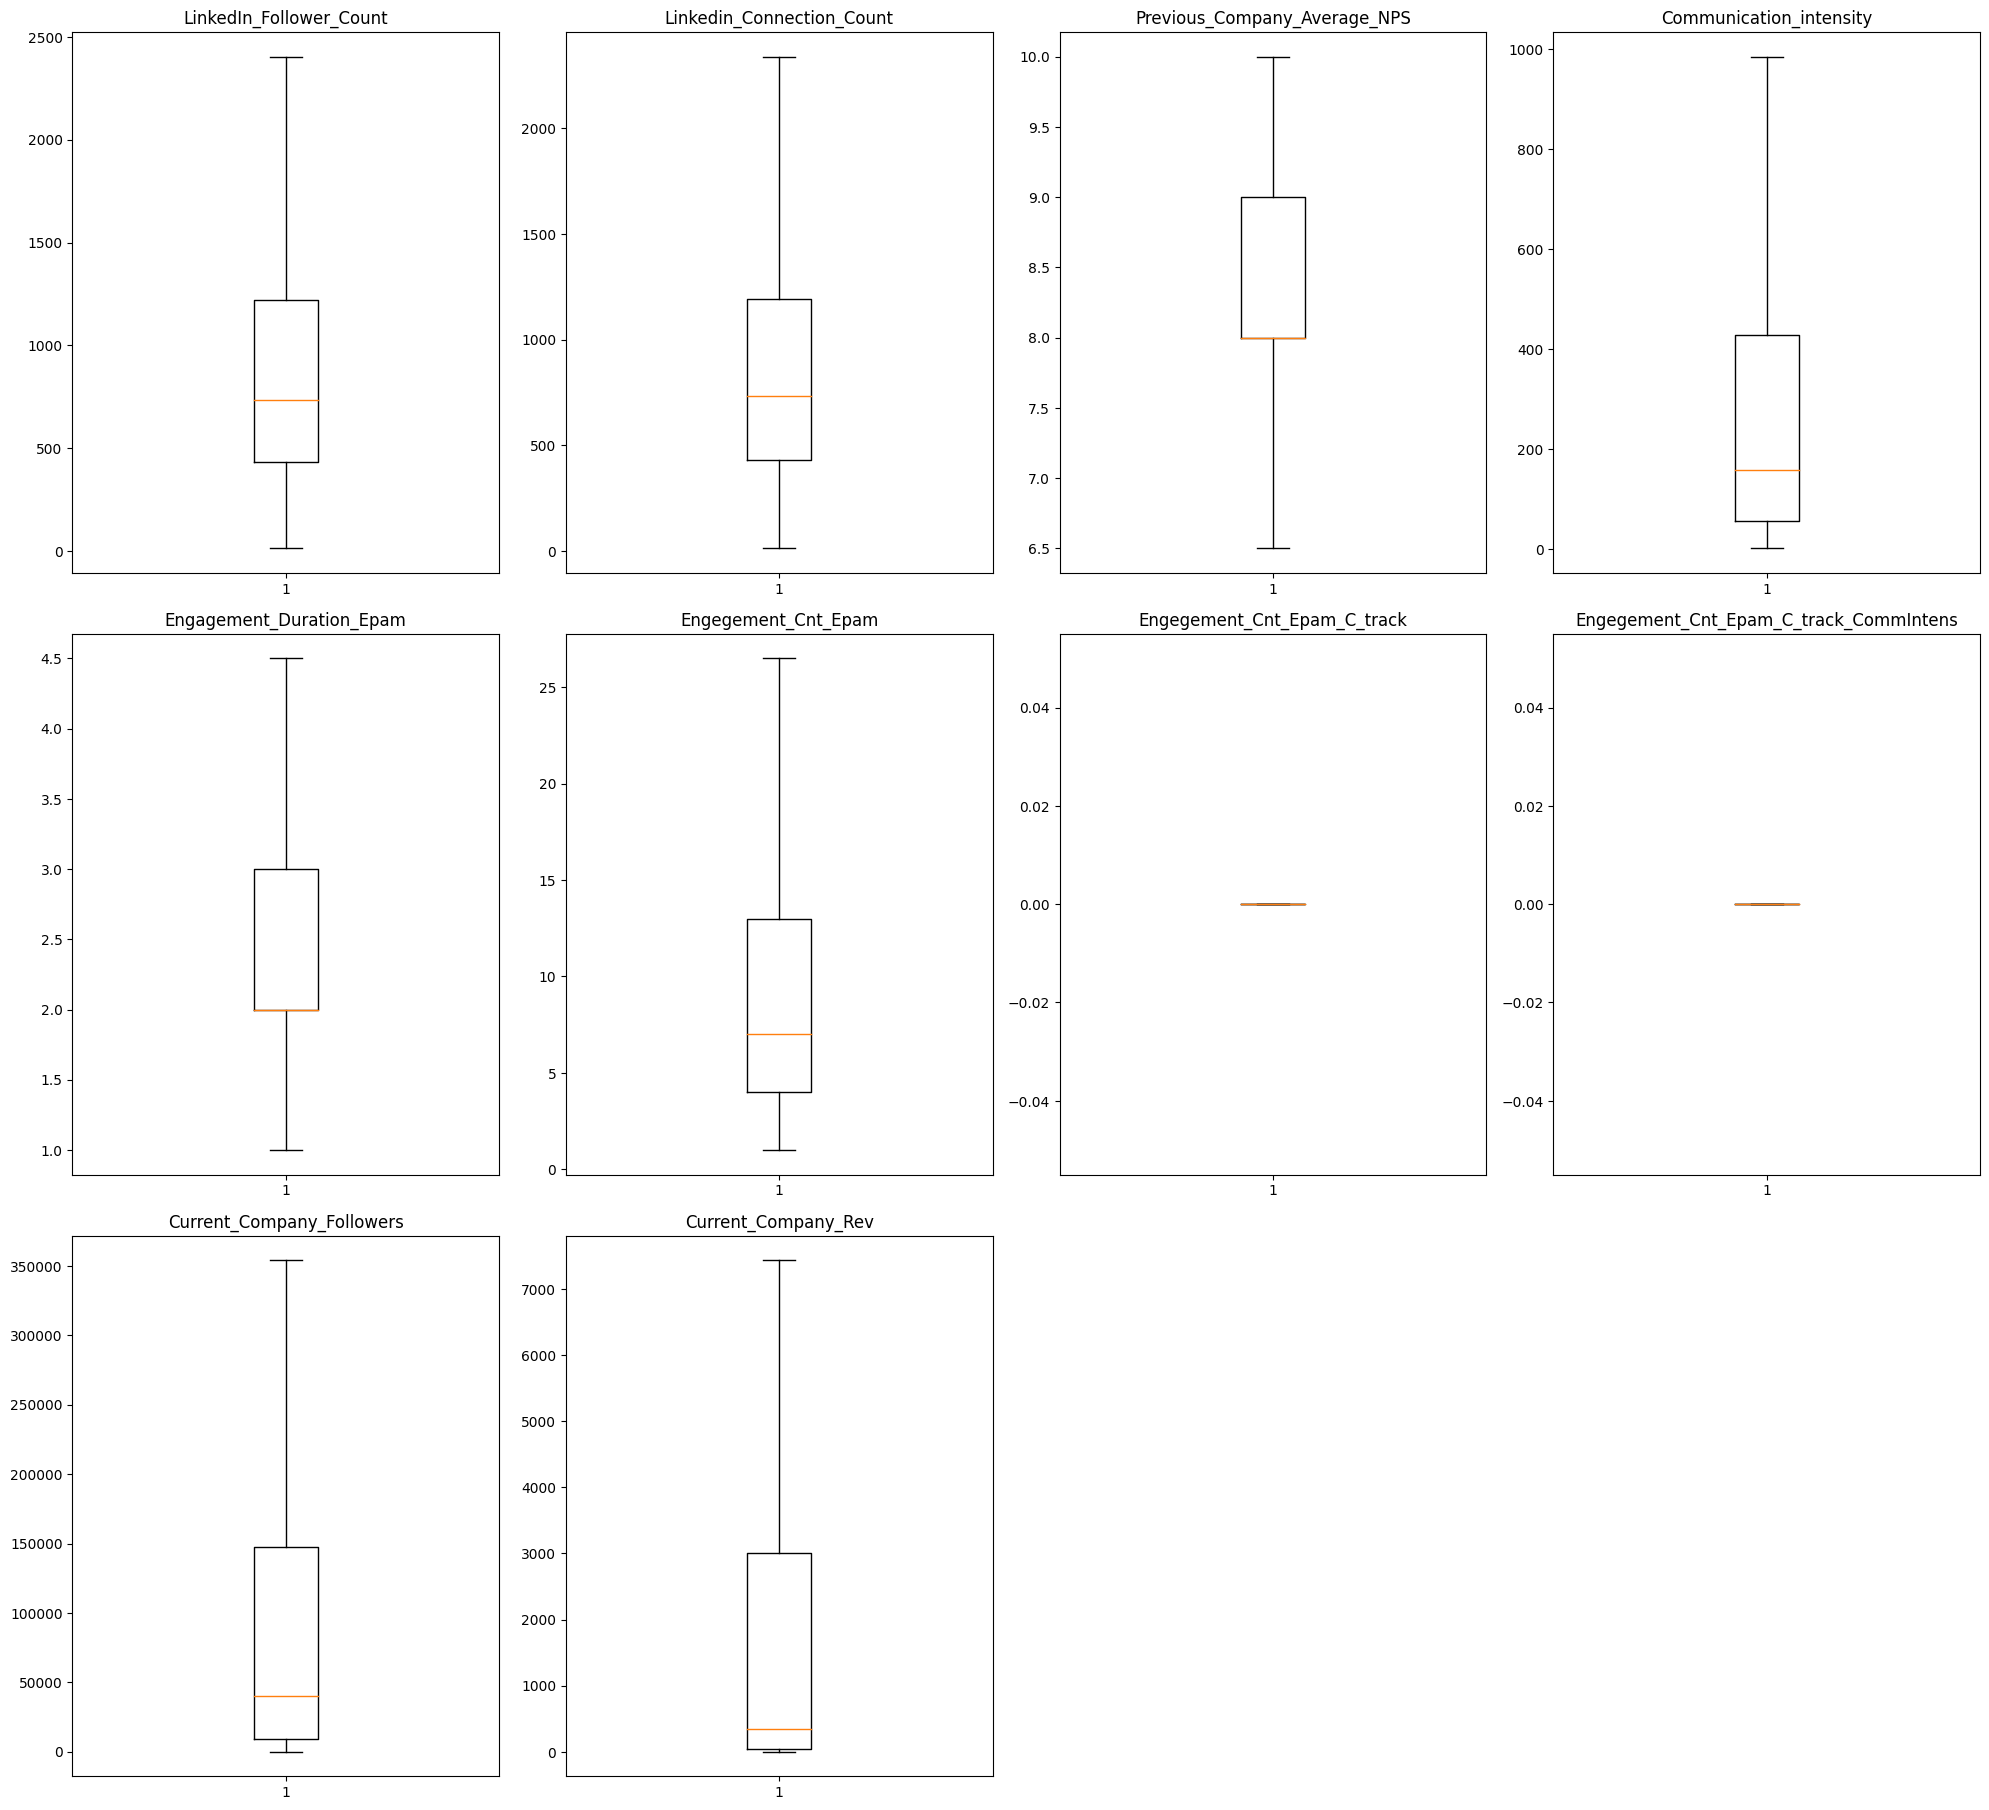

In [97]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
X_val = treat_outliers_all(X_train, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_val[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**3.3.3** **Outlier Fixing On Test Set**

In [98]:
numerical_col=X_test.select_dtypes(include=np.number).columns.tolist()

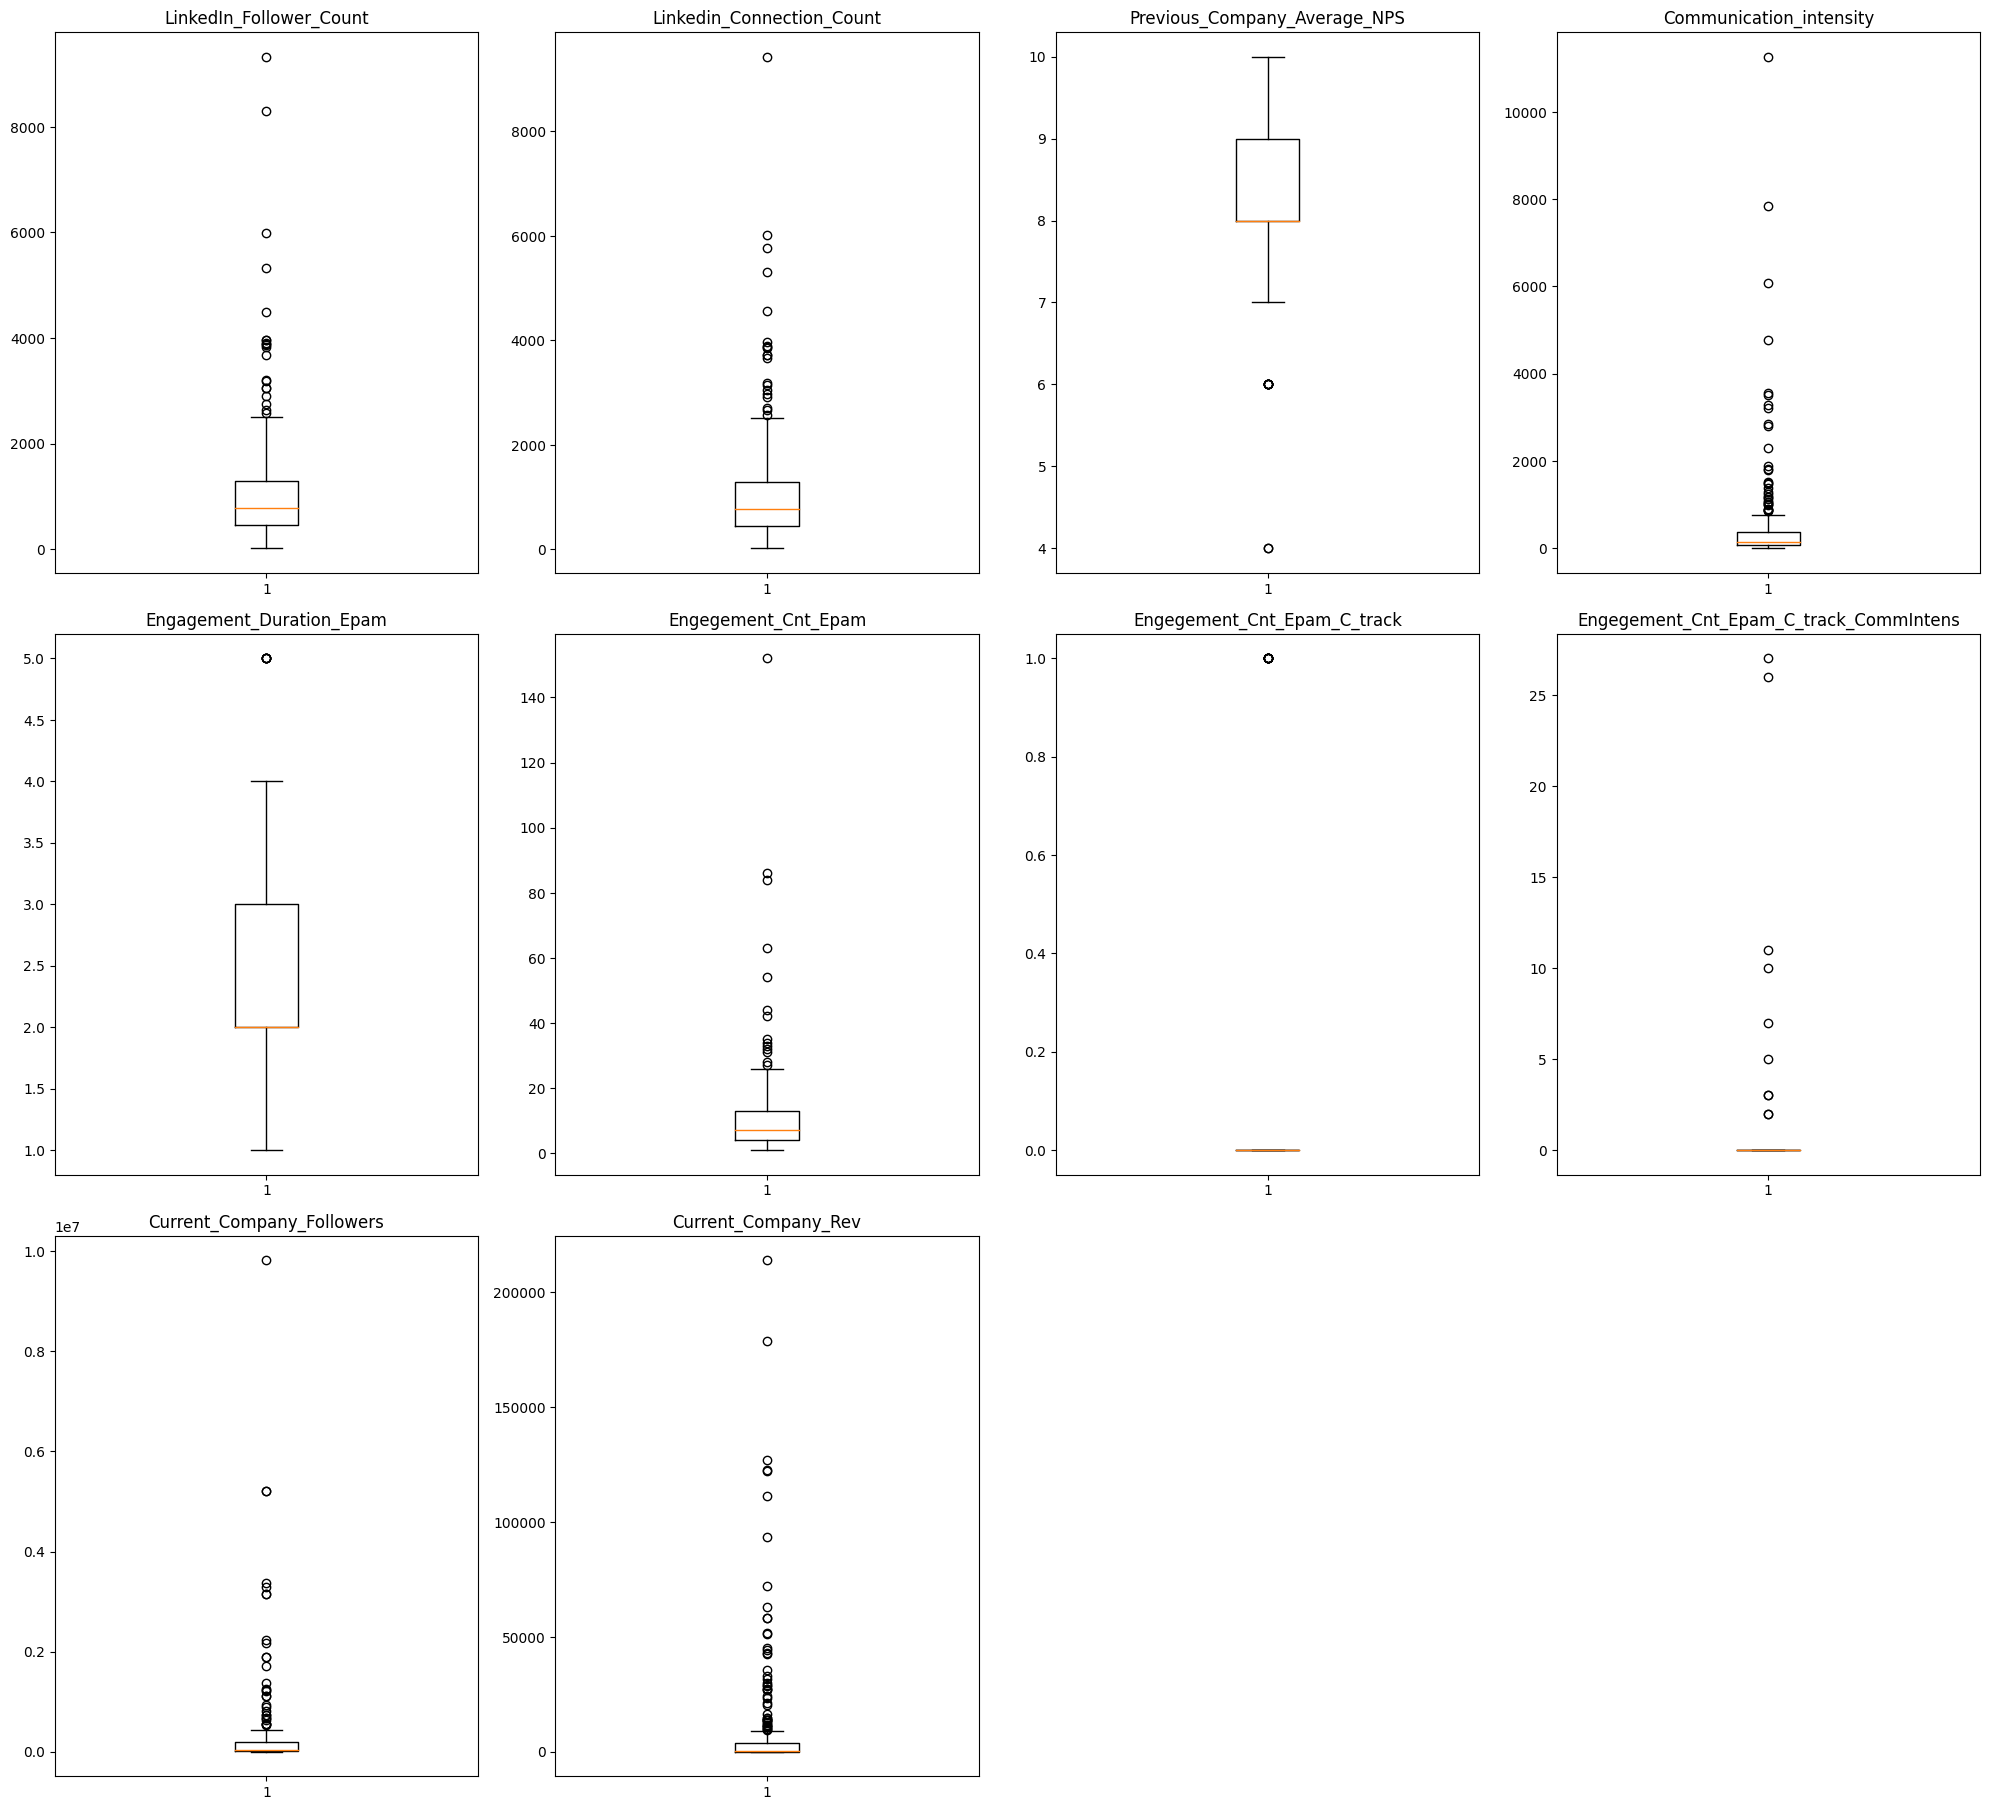

In [99]:
numerical_col = X_test.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_test[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

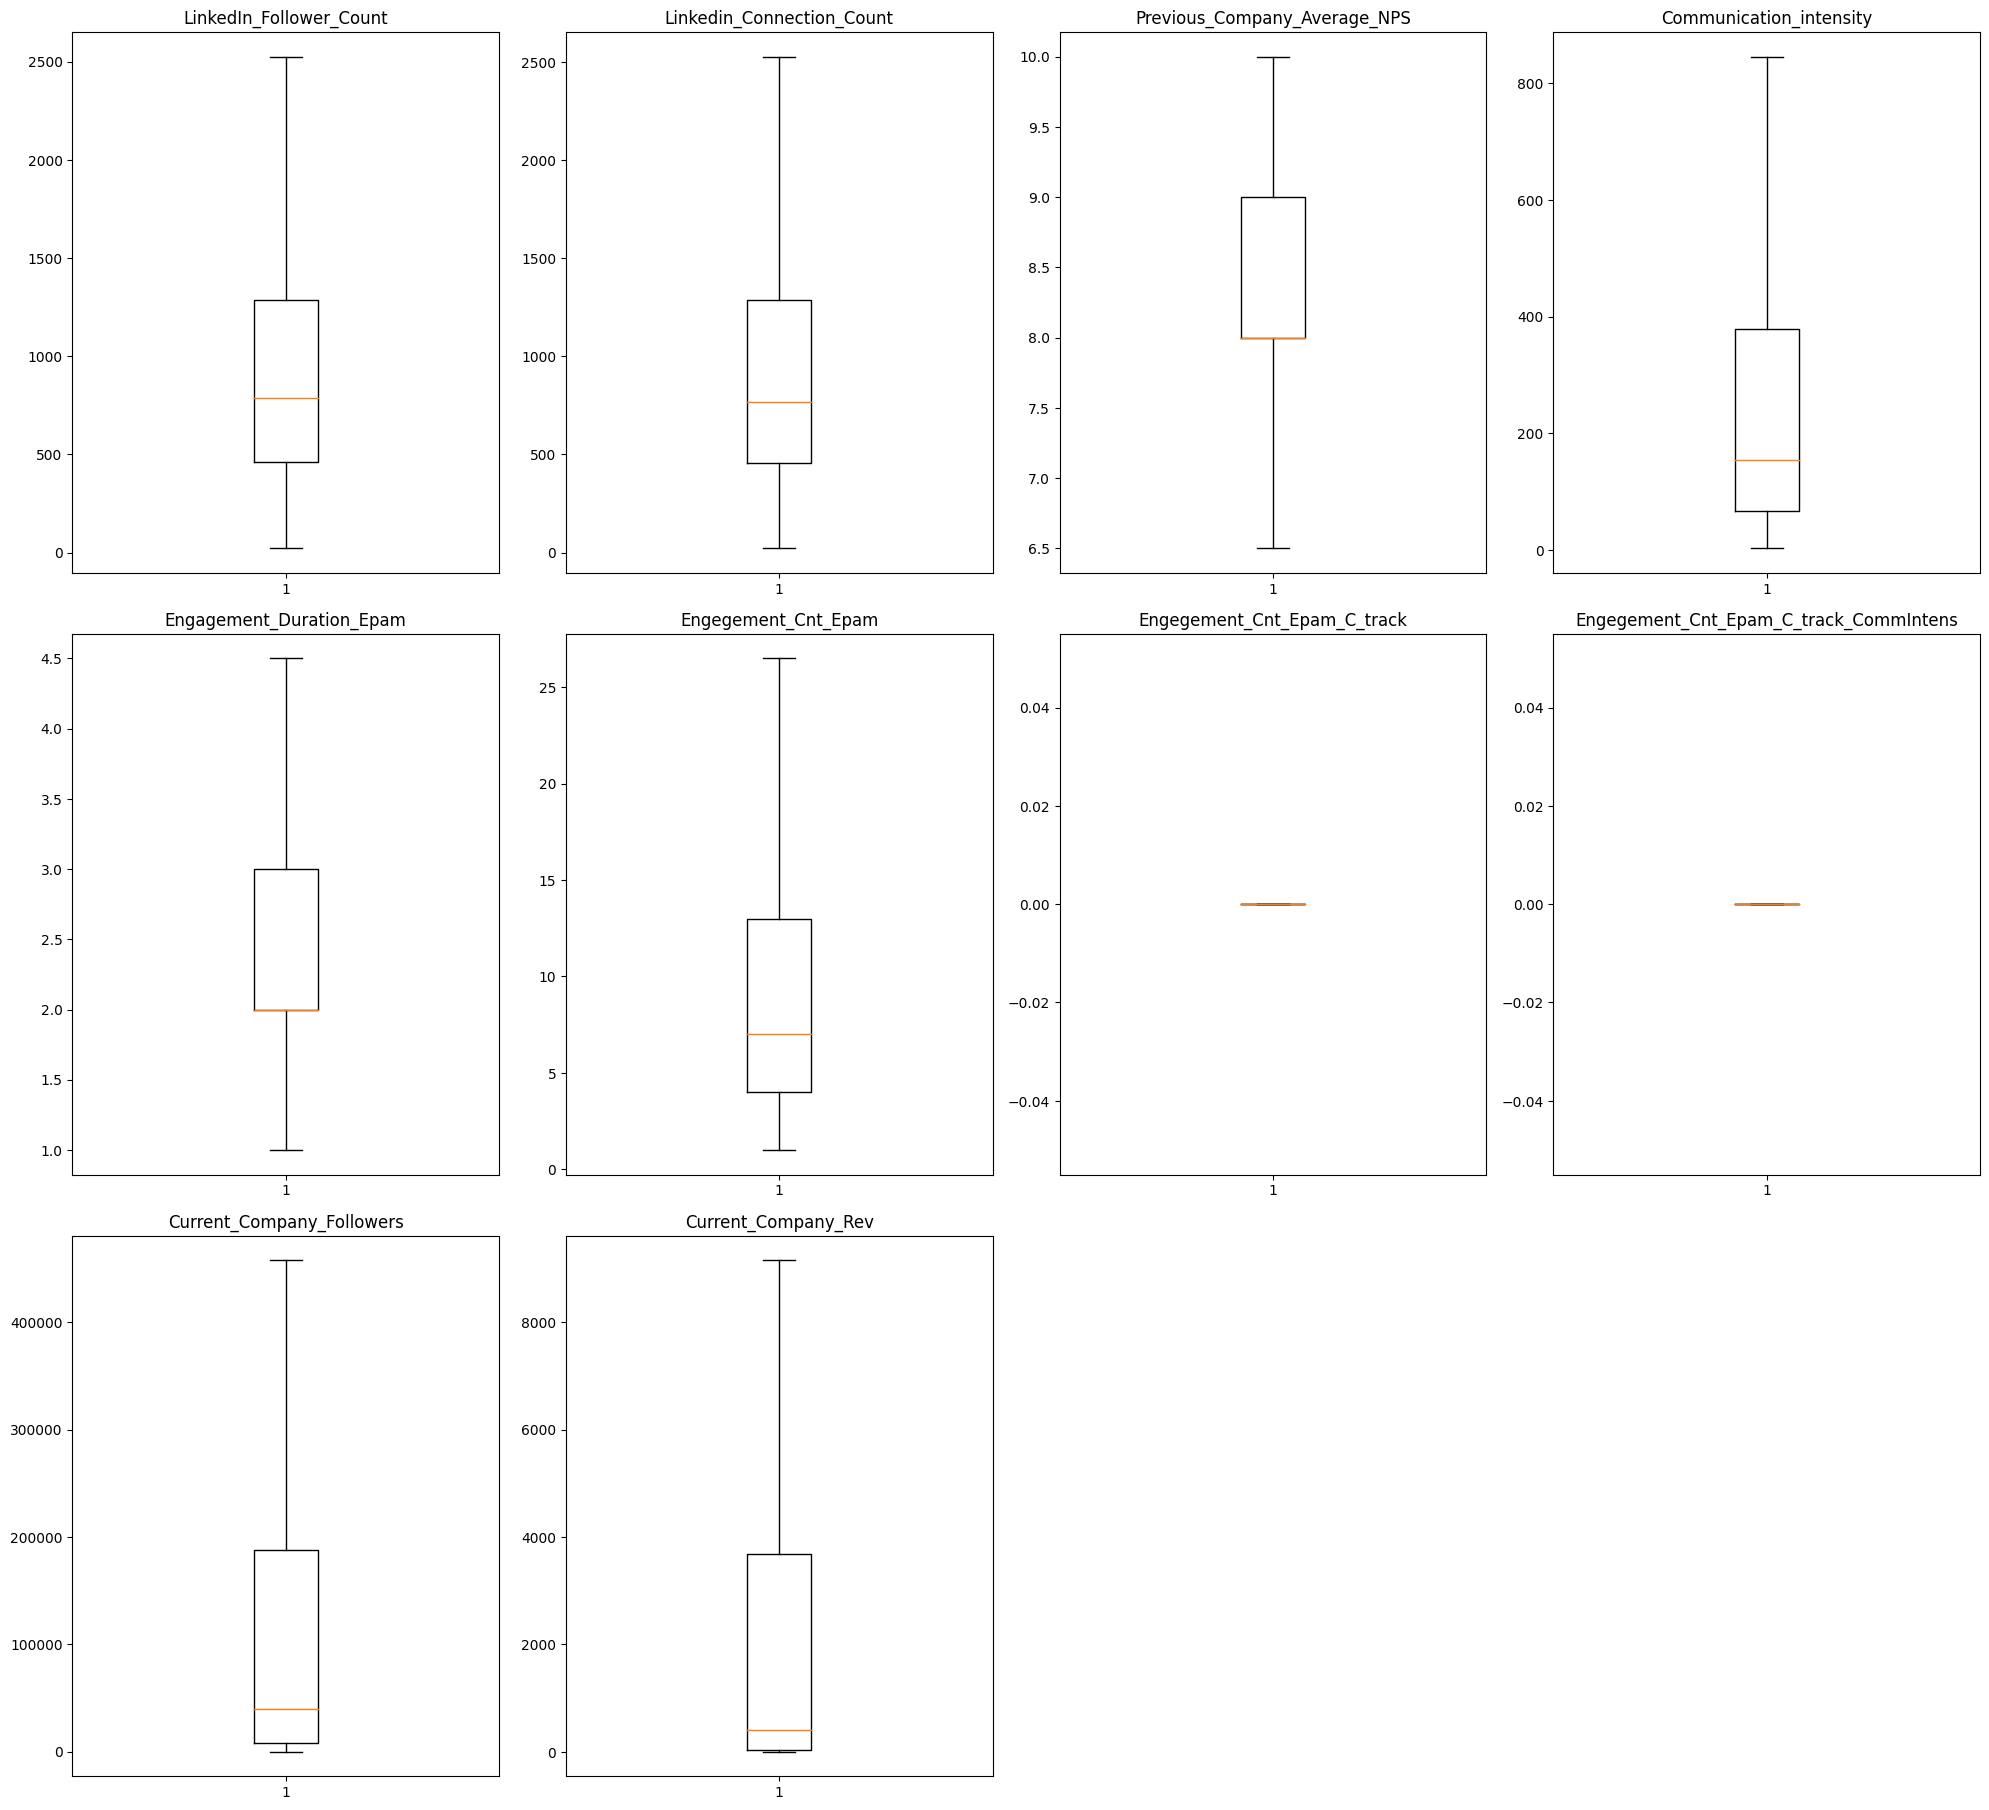

In [100]:
numerical_col = X_test.select_dtypes(include=np.number).columns.tolist()
X_val = treat_outliers_all(X_test, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_val[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**3.4** **One Hot Encoding For Categorical Values On Training Data Set**


In [101]:
X_train__one_hot_encoding = pd.get_dummies(X_train, drop_first=True)

In [102]:
X_train__one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 950 to 925
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   LinkedIn_Follower_Count                           1084 non-null   float64
 1   Linkedin_Connection_Count                         1084 non-null   float64
 2   Previous_Company_Average_NPS                      1084 non-null   float64
 3   Communication_intensity                           1084 non-null   float64
 4   Engagement_Duration_Epam                          1084 non-null   float64
 5   Engegement_Cnt_Epam                               1084 non-null   float64
 6   Engegement_Cnt_Epam_C_track                       1084 non-null   float64
 7   Engegement_Cnt_Epam_C_track_CommIntens            1084 non-null   float64
 8   Current_Company_Followers                         1084 non-null   float64
 9   Current_Company_Re

In [103]:
X_train=X_train__one_hot_encoding

In [104]:
X_test__one_hot_encoding = pd.get_dummies(X_test, drop_first=True)

In [105]:
X_test__one_hot_encoding

,LinkedIn_Follower_Count,Linkedin_Connection_Count,Previous_Company_Average_NPS,Communication_intensity,Engagement_Duration_Epam,Engegement_Cnt_Epam,Engegement_Cnt_Epam_C_track,Engegement_Cnt_Epam_C_track_CommIntens,Current_Company_Followers,Current_Company_Rev,Previous_Seniority_Level_2,Previous_Seniority_Level_1,Previous_Seniority_Level_0,Current_Seniority_Level_2,Current_Seniority_Level_1,Current_Seniority_Level_0,Previous_Company_Size_Size_2,Previous_Company_Size_Size_3,Previous_Company_Industry_EPAM_EDU,Previous_Company_Industry_EPAM_FS,Previous_Company_Industry_EPAM_HC,Previous_Company_Industry_EPAM_Hi-Tech,Previous_Company_Industry_EPAM_INS,Previous_Company_Industry_EPAM_ISV,Previous_Company_Industry_EPAM_LS,Previous_Company_Industry_EPAM_M&E,Previous_Company_Industry_EPAM_MFG,Previous_Company_Industry_EPAM_Oil&Gas/Utilities,Previous_Company_Industry_EPAM_Other,Previous_Company_Industry_EPAM_T&H,Previous_Company_Forbes_1,First_engagement_year_2018.0,First_engagement_year_2019.0,First_engagement_year_2020.0,First_engagement_year_2021.0,First_engagement_year_2022.0,Seniority_Level_Of_Epam_2,Seniority_Level_Of_Epam_1,Seniority_Level_Of_Epam_0,Current_Company_Size_Size_2,Current_Company_Size_Size_3,Current_Company_Tier_TIER 2,Current_Company_Tier_TIER 3,Current_Company_Industry_EPAM_EDU,Current_Company_Industry_EPAM_FS,Current_Company_Industry_EPAM_HC,Current_Company_Industry_EPAM_Hi-Tech,Current_Company_Industry_EPAM_INS,Current_Company_Industry_EPAM_ISV,Current_Company_Industry_EPAM_LS,Current_Company_Industry_EPAM_M&E,Current_Company_Industry_EPAM_MFG,Current_Company_Industry_EPAM_Oil&Gas/Utilities,Current_Company_Industry_EPAM_Other,Current_Company_Industry_EPAM_T&H,Current_Company_Forbes_1
981,459.0,449.0,8.0,845.75,2.0,26.5,0.0,0.0,100288.00,400.0000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601,813.0,811.0,6.5,845.75,3.0,26.5,0.0,0.0,457798.25,9152.6875,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
149,1548.0,1473.0,8.0,282.00,3.0,10.0,0.0,0.0,10154.00,21.0000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1064,1532.0,1513.0,8.0,266.00,2.0,4.0,0.0,0.0,14643.00,8.0000,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
955,786.0,769.0,7.0,146.00,2.0,5.0,0.0,0.0,26589.00,5.0000,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,353.0,349.0,8.0,68.00,3.0,7.0,0.0,0.0,457798.25,9152.6875,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
980,786.0,769.0,8.0,845.75,2.0,26.5,0.0,0.0,457798.25,9152.6875,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1143,364.0,350.0,9.0,636.00,4.0,12.0,0.0,0.0,2347.00,5.0000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
565,1912.0,1901.0,8.0,12.00,1.0,3.0,0.0,0.0,3325.00,9152.6875,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [106]:
X_test=X_test__one_hot_encoding

**4.0** **Scale Data**

Scaling Data is important step for unsupervised learning  process to avoid the problem of one feature dominating over others due to unsupervised learning algorithm uses distance to find the similarity between data points.

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [107]:
sc = StandardScaler()


In [108]:
X_train_Scaled = pd.DataFrame(
    sc.fit_transform(X_train),
)


In [109]:
X_train_Scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,-0.175826,-0.161040,2.361902,-0.843707,-1.271181,-1.053079,0.0,0.0,-0.487921,-0.699820,-0.823419,1.495266,-0.235587,-0.803067,1.310264,-0.030387,-0.419172,0.478566,-0.129944,-0.210514,-0.20324,-0.185341,-0.105802,-0.784538,-0.190601,-0.260730,-0.203240,-0.096493,-0.187987,2.204418,-0.571669,1.870274,-0.391397,-0.394525,-0.254623,-0.08062,-2.411972,-0.246303,-0.143929,-0.513228,-1.117570,-0.410004,1.394866,-0.126224,-0.386682,-0.268711,-0.262742,-0.174408,1.242820,-0.162835,-0.182661,-0.205688,-0.086226,-0.246303,-0.254623,-0.329218
1,1.173744,1.263741,1.007245,-0.626511,0.991480,-0.633576,0.0,0.0,-0.689481,-0.447137,-0.823419,1.495266,-0.235587,1.245226,-0.763205,-0.030387,2.385657,-2.089578,-0.129944,-0.210514,-0.20324,-0.185341,-0.105802,-0.784538,-0.190601,3.835381,-0.203240,-0.096493,-0.187987,-0.453634,-0.571669,-0.534681,-0.391397,-0.394525,-0.254623,-0.08062,-2.411972,-0.246303,-0.143929,1.948451,-1.117570,-0.410004,-0.716915,-0.126224,-0.386682,-0.268711,-0.262742,-0.174408,1.242820,-0.162835,-0.182661,-0.205688,-0.086226,-0.246303,-0.254623,-0.329218
2,-1.109304,-1.128029,-0.347412,1.003989,-0.139851,0.624933,0.0,0.0,2.091631,-0.401109,1.214449,-0.668777,-0.235587,1.245226,-0.763205,-0.030387,-0.419172,0.478566,-0.129944,-0.210514,-0.20324,-0.185341,-0.105802,-0.784538,-0.190601,-0.260730,4.920295,-0.096493,-0.187987,-0.453634,-0.571669,-0.534681,2.554952,-0.394525,-0.254623,-0.08062,0.414598,-0.246303,-0.143929,1.948451,-1.117570,-0.410004,-0.716915,-0.126224,-0.386682,-0.268711,-0.262742,-0.174408,1.242820,-0.162835,-0.182661,-0.205688,-0.086226,-0.246303,-0.254623,-0.329218
3,-0.252187,-0.246174,1.007245,2.102588,2.688475,2.372863,0.0,0.0,2.091631,0.752650,-0.823419,-0.668777,4.244708,1.245226,-0.763205,-0.030387,-0.419172,0.478566,-0.129944,-0.210514,-0.20324,-0.185341,-0.105802,-0.784538,-0.190601,-0.260730,-0.203240,-0.096493,-0.187987,-0.453634,-0.571669,-0.534681,-0.391397,-0.394525,-0.254623,-0.08062,0.414598,-0.246303,-0.143929,-0.513228,0.894799,-0.410004,-0.716915,-0.126224,-0.386682,-0.268711,-0.262742,-0.174408,-0.804622,-0.162835,-0.182661,-0.205688,-0.086226,-0.246303,-0.254623,-0.329218
4,-0.487505,-0.485512,-0.347412,-0.828412,-0.139851,-0.913245,0.0,0.0,0.534877,2.002247,-0.823419,-0.668777,4.244708,-0.803067,-0.763205,-0.030387,-0.419172,0.478566,-0.129944,-0.210514,-0.20324,-0.185341,-0.105802,-0.784538,-0.190601,-0.260730,-0.203240,-0.096493,5.319520,-0.453634,-0.571669,1.870274,-0.391397,-0.394525,-0.254623,-0.08062,0.414598,-0.246303,-0.143929,-0.513228,0.894799,-0.410004,-0.716915,-0.126224,-0.386682,-0.268711,-0.262742,-0.174408,-0.804622,-0.162835,-0.182661,4.861724,-0.086226,-0.246303,-0.254623,-0.329218


In [110]:
X_test_Scaled = pd.DataFrame(
    sc.fit_transform(X_test),
)


In [111]:
X_test_Scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,-0.737745,-0.743045,-0.271075,2.086292,-0.171596,2.385253,0.0,0.0,-0.126894,-0.581501,1.232282,-0.750479,-0.184988,1.343177,-0.888523,-0.060746,-0.457044,0.497701,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,1.251414,-0.162527,-0.25,-0.136845,0.0,-0.205294,-0.497701,-0.634083,-0.462910,-0.433328,2.691175,-0.266207,-0.060746,0.433328,-0.195366,-0.25,-0.491944,0.908572,-0.33197,-0.738549,-0.060746,-0.402980,-0.266207,-0.232945,-0.150188,1.168425,-0.205294,-0.174078,-0.214834,-0.060746,-0.232945,-0.232945,-0.352089
1,-0.209152,-0.199667,-2.211404,2.086292,1.025179,2.385253,0.0,0.0,2.209798,1.918105,-0.811503,1.332483,-0.184988,1.343177,-0.888523,-0.060746,2.187975,-2.009238,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,-0.799096,-0.162527,-0.25,-0.136845,0.0,-0.205294,2.009238,-0.634083,-0.462910,-0.433328,-0.371585,-0.266207,-0.060746,0.433328,-0.195366,-0.25,-0.491944,0.908572,-0.33197,-0.738549,-0.060746,-0.402980,-0.266207,-0.232945,-0.150188,1.168425,-0.205294,-0.174078,-0.214834,-0.060746,-0.232945,-0.232945,2.840188
2,0.888350,0.794025,-0.271075,0.040613,1.025179,0.073155,0.0,0.0,-0.716011,-0.689736,-0.811503,1.332483,-0.184988,-0.744504,1.125463,-0.060746,-0.457044,0.497701,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,-0.799096,-0.162527,-0.25,-0.136845,0.0,-0.205294,2.009238,-0.634083,-0.462910,-0.433328,-0.371585,-0.266207,-0.060746,0.433328,-0.195366,-0.25,-0.491944,-1.100628,-0.33197,1.354006,-0.060746,2.481511,-0.266207,-0.232945,-0.150188,-0.855853,-0.205294,-0.174078,-0.214834,-0.060746,-0.232945,-0.232945,-0.352089
3,0.864459,0.854067,-0.271075,-0.017446,-0.171596,-0.767609,0.0,0.0,-0.686671,-0.693449,-0.811503,1.332483,-0.184988,-0.744504,1.125463,-0.060746,-0.457044,0.497701,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,1.251414,-0.162527,-0.25,-0.136845,0.0,-0.205294,-0.497701,-0.634083,-0.462910,-0.433328,2.691175,-0.266207,-0.060746,0.433328,-0.195366,-0.25,2.032751,-1.100628,-0.33197,1.354006,-0.060746,-0.402980,3.756476,-0.232945,-0.150188,-0.855853,-0.205294,-0.174078,-0.214834,-0.060746,-0.232945,-0.232945,-0.352089
4,-0.249469,-0.262710,-1.564628,-0.452890,-0.171596,-0.627481,0.0,0.0,-0.608591,-0.694306,1.232282,-0.750479,-0.184988,-0.744504,-0.888523,-0.060746,-0.457044,0.497701,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,1.251414,-0.162527,-0.25,-0.136845,0.0,-0.205294,-0.497701,-0.634083,-0.462910,-0.433328,-0.371585,-0.266207,-0.060746,0.433328,-0.195366,-0.25,-0.491944,0.908572,-0.33197,1.354006,-0.060746,-0.402980,3.756476,-0.232945,-0.150188,-0.855853,-0.205294,-0.174078,-0.214834,-0.060746,-0.232945,-0.232945,-0.352089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,-0.896025,-0.893149,-0.271075,-0.735929,1.025179,-0.347227,0.0,0.0,2.209798,1.918105,1.232282,-0.750479,-0.184988,1.343177,-0.888523,-0.060746,-0.457044,0.497701,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,-0.799096,-0.162527,-0.25,-0.136845,0.0,-0.205294,2.009238,1.577079,2.160247,-0.433328,-0.371585,-0.266207,-0.060746,0.433328,-0.195366,-0.25,-0.491944,0.908572,-0.33197,-0.738549,-0.060746,-0.402980,-0.266207,-0.232945,-0.150188,1.168425,-0.205294,-0.174078,-0.214834,-0.060746,-0.232945,-0.232945,2.840188
268,-0.249469,-0.262710,-0.271075,2.086292,-0.171596,2.385253,0.0,0.0,2.209798,1.918105,1.232282,-0.750479,-0.184988,-0.744504,1.125463,-0.060746,-0.457044,0.497701,-0.060746,-0.25,-0.214834,-0.232945,-0.105605,1.251414,-0.162527,-0.25,-0.136845,0.0,-0.205294,-0.497701,-0.634083,-0.462910,-0.433328,2.691175,-0.266207,-0.060746,0.433328,-0.195366,-0.25,-0.491944,0.908572,-0.33197,-0.738549,-0.060746,-0.402980,-0.266207,-0.232945,-0.150188,-0.855853,-0.205294,-0.174078,4.654747,-0.060746,

In [112]:
X_train=X_train_Scaled

In [113]:
X_test=X_test_Scaled

##5-MODEL BUILDING

In [114]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

##5.1-MODEL(1)

In [115]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [116]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1], units=64))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32,kernel_initializer='he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

In [117]:
optprm = keras.optimizers.SGD(learning_rate=1e-3)

In [118]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer=optprm, loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=20,
          batch_size=32,verbose=1)

Epoch 1/20
28/28 [==============================] - 1s 16ms/step - loss: 0.6906 - accuracy: 0.6078 - val_loss: 0.6452 - val_accuracy: 0.6359
Epoch 2/20
28/28 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.6078 - val_loss: 0.6435 - val_accuracy: 0.6406
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.6113 - val_loss: 0.6415 - val_accuracy: 0.6452
Epoch 4/20
28/28 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.6136 - val_loss: 0.6398 - val_accuracy: 0.6452
Epoch 5/20
28/28 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.6113 - val_loss: 0.6382 - val_accuracy: 0.6452
Epoch 6/20
28/28 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.6148 - val_loss: 0.6370 - val_accuracy: 0.6452
Epoch 7/20
28/28 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.6159 - val_loss: 0.6357 - val_accuracy: 0.6544
Epoch 8/20
28/28 [=

9/9 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6691


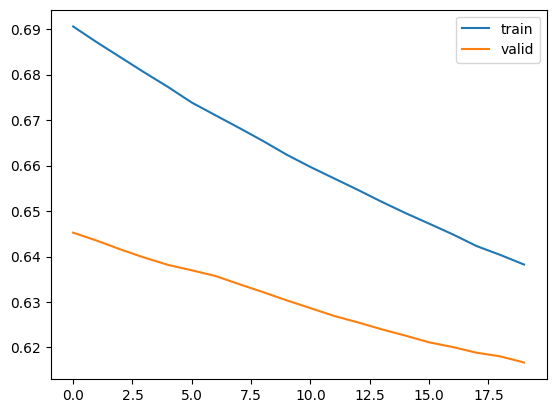

In [120]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [121]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

9/9 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [122]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       168
           1       0.60      0.41      0.49       104

    accuracy                           0.67       272
   macro avg       0.65      0.62      0.62       272
weighted avg       0.66      0.67      0.65       272



Recall is not good for MODEL -1

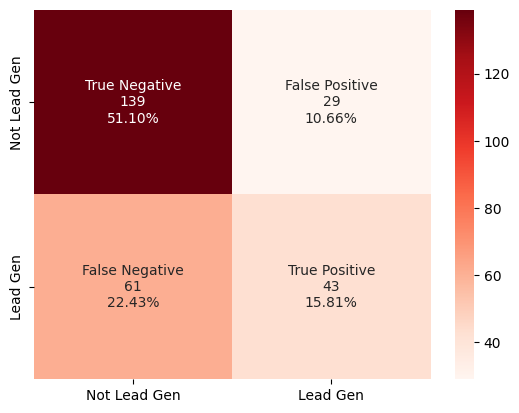

In [123]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Lead Gen','Lead Gen']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

9/9 [==============================] - 0s 2ms/step
Best Threshold=0.341224, G-Mean=0.634


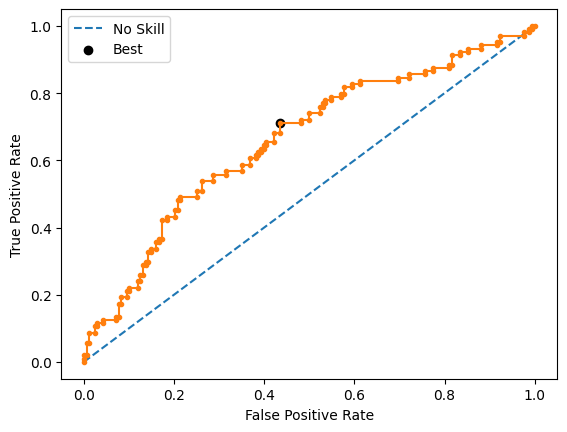

In [124]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [125]:
#Predicting the results using best as a threshold
y_pred_e=model.predict(X_test)
y_pred_e = (y_pred_e > thresholds1[ix])
y_pred_e

9/9 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

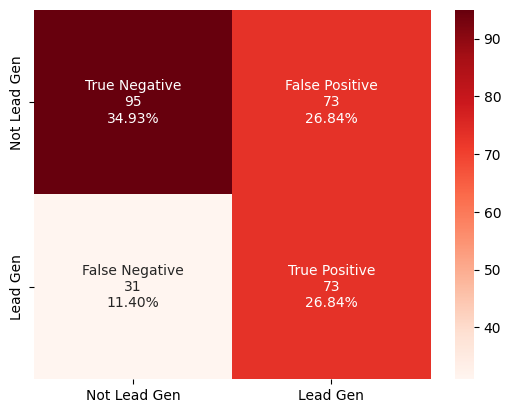

In [126]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Lead Gen','Lead Gen']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [127]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       168
           1       0.50      0.70      0.58       104

    accuracy                           0.62       272
   macro avg       0.63      0.63      0.62       272
weighted avg       0.66      0.62      0.62       272



##5.2-MODEL(2)

In [128]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [129]:
# Initializing the model
model1 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
# Adding the Output Layer with binary classification Sigmoid Function
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [130]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3648      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________


In [131]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split = 0.2)

Epoch 1/10
14/14 [==============================] - 1s 22ms/step - loss: 0.6656 - accuracy: 0.6321 - val_loss: 0.6082 - val_accuracy: 0.6636
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5916 - accuracy: 0.6920 - val_loss: 0.5852 - val_accuracy: 0.6774
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5477 - accuracy: 0.7151 - val_loss: 0.5761 - val_accuracy: 0.6820
Epoch 4/10
14/14 [==============================] - 0s 8ms/step - loss: 0.5168 - accuracy: 0.7336 - val_loss: 0.5647 - val_accuracy: 0.7005
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4932 - accuracy: 0.7532 - val_loss: 0.5603 - val_accuracy: 0.7143
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4726 - accuracy: 0.7636 - val_loss: 0.5587 - val_accuracy: 0.7051
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4547 - accuracy: 0.7728 - val_loss: 0.5561 - val_accuracy: 0.7005
Epoch 8/10
14/14 [=

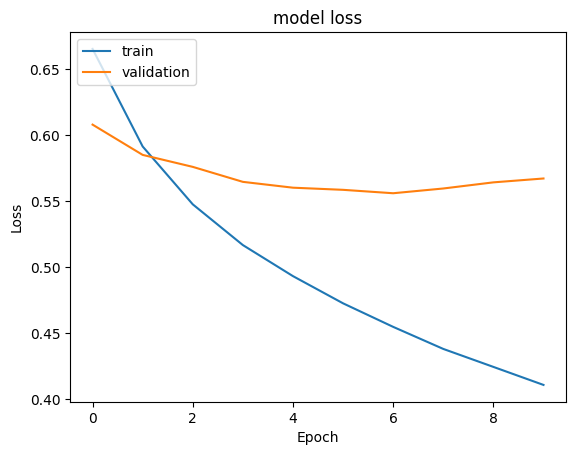

In [132]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

9/9 [==============================] - 0s 2ms/step
Best Threshold=0.335109, G-Mean=0.701


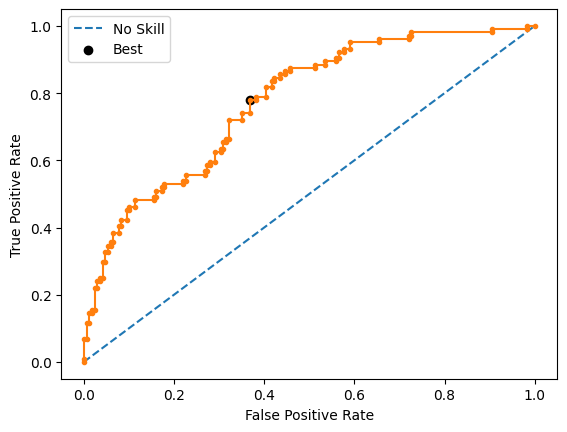

In [133]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [134]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

9/9 [==============================] - 0s 3ms/step


array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

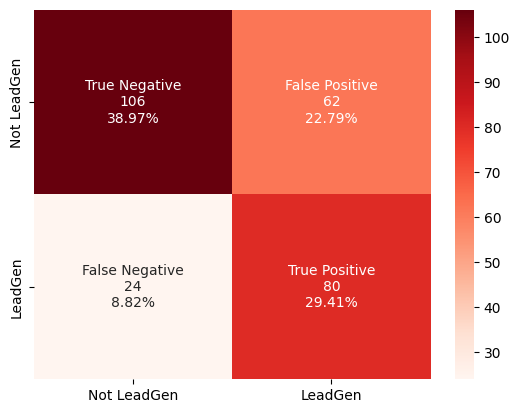

In [135]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not LeadGen','LeadGen']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [136]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       168
           1       0.56      0.77      0.65       104

    accuracy                           0.68       272
   macro avg       0.69      0.70      0.68       272
weighted avg       0.72      0.68      0.69       272



### Model 3 - BATCH NORMALIZATION TECHNIQUE

In [137]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [138]:
# Initializing the model
model2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model2.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Adding Batch Normalization Layer
model2.add(BatchNormalization())
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
#Adding Output Layer
model2.add(Dense(1, activation = 'sigmoid'))

In [139]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3648      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,017
Trainable params: 5,889
Non-trainable params: 128
_________________________________________________________________


In [140]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [141]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
14/14 [==============================] - 1s 22ms/step - loss: 0.6878 - accuracy: 0.6286 - val_loss: 0.5961 - val_accuracy: 0.6912
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.5823 - accuracy: 0.6874 - val_loss: 0.5739 - val_accuracy: 0.6866
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.5218 - accuracy: 0.7278 - val_loss: 0.5594 - val_accuracy: 0.6820
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.4956 - accuracy: 0.7382 - val_loss: 0.5524 - val_accuracy: 0.6912
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.4626 - accuracy: 0.7809 - val_loss: 0.5492 - val_accuracy: 0.6912
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 0.7924 - val_loss: 0.5467 - val_accuracy: 0.6866
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4237 - accuracy: 0.8005 - val_loss: 0.5478 - val_accuracy: 0.6959
Epoch 8/50
14/14 [=

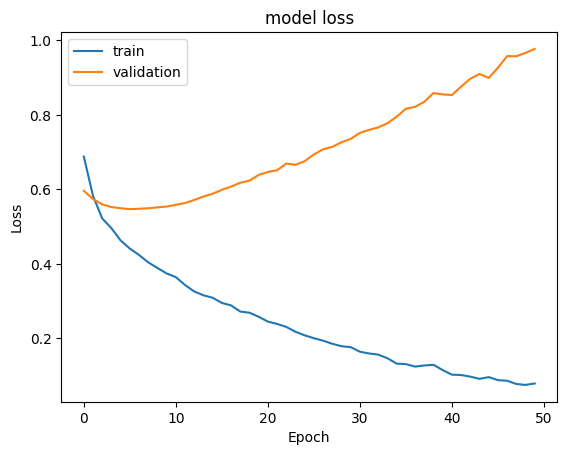

In [142]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

9/9 [==============================] - 0s 3ms/step
Best Threshold=0.097957, G-Mean=0.651


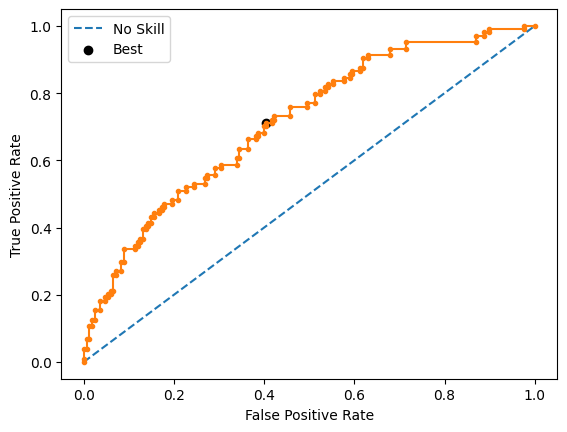

In [143]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [144]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

9/9 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

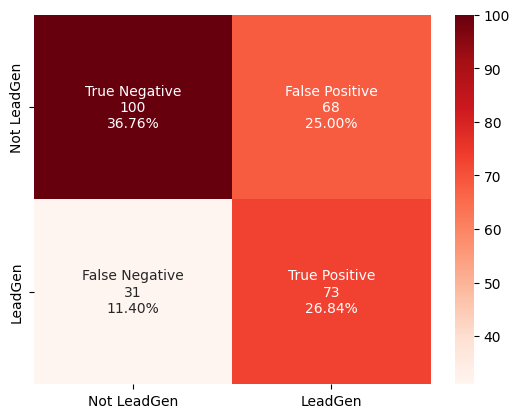

In [145]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not LeadGen','LeadGen']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [146]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       168
           1       0.52      0.70      0.60       104

    accuracy                           0.64       272
   macro avg       0.64      0.65      0.63       272
weighted avg       0.67      0.64      0.64       272



### Model 4 DROPOUT TECHNIQUE

In [147]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [148]:
# Initializing the model
model3 = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model3.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
#Adding DropOut with %20 Ratio
model3.add(Dropout(0.2))
#Adding hidden layer with 128 Neurons
model3.add(Dense(64,activation='relu'))
#Adding Dropout
model3.add(Dropout(0.2))
#Adding hidden layer with 64 Neurons
model3.add(Dense(32,activation='relu'))
#Adding Output Layer
model3.add(Dense(1, activation = 'sigmoid'))

In [149]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7296      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-traina

In [150]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [151]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
14/14 [==============================] - 2s 33ms/step - loss: 0.6752 - accuracy: 0.5767 - val_loss: 0.6186 - val_accuracy: 0.6682
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 0.6101 - accuracy: 0.6413 - val_loss: 0.5815 - val_accuracy: 0.6959
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 0.5592 - accuracy: 0.7036 - val_loss: 0.5611 - val_accuracy: 0.7051
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 0.5224 - accuracy: 0.7290 - val_loss: 0.5592 - val_accuracy: 0.6912
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.4956 - accuracy: 0.7636 - val_loss: 0.5654 - val_accuracy: 0.7051
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.4789 - accuracy: 0.7670 - val_loss: 0.5610 - val_accuracy: 0.7051
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.4689 - accuracy: 0.7647 - val_loss: 0.5607 - val_accuracy: 0.7005
Epoch 8/50
14/14 [=

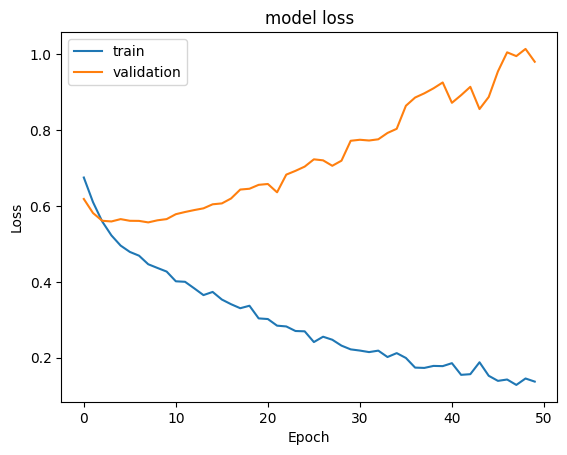

In [152]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

9/9 [==============================] - 0s 2ms/step
Best Threshold=0.193222, G-Mean=0.719


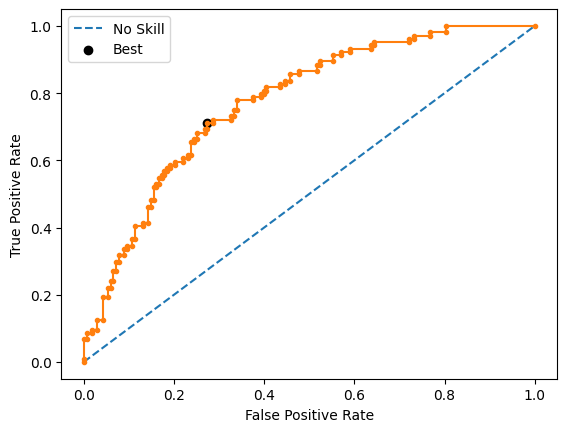

In [153]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [154]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

9/9 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

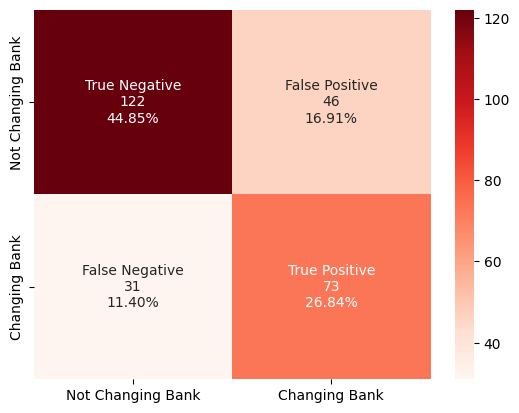

In [155]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [156]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       168
           1       0.61      0.70      0.65       104

    accuracy                           0.72       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.73      0.72      0.72       272



### Model 5 Random Search CV Hyper Paremeter Tuning

In [157]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [158]:
def create_model_v4(lr,batch_size):
    np.random.seed(1337)
    #Initiating the model
    model = Sequential()
    #Adding input layer with 256 neurons, relu as activation function and, he_uniform as weight initializer.
    model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.3))
    #Adding hidden layer with 128 Neurons
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.3))
    #Adding hidden layer with 64 Neurons
    model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.2))
    #Adding hidden layer with 32 Neurons
    model.add(Dense(32,activation='relu'))
    #Adding Output Layer
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

Try to optimize BATCH Size , Learning Rate and EPOCS

In [159]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],
    'epochs': [10, 20, 30, 40]}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [160]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/40
7/7 [==============================] - 2s 47ms/step - loss: 0.7947 - accuracy: 0.5433 - val_loss: 0.6230 - val_accuracy: 0.6452
Epoch 2/40
7/7 [==============================] - 0s 12ms/step - loss: 0.6878 - accuracy: 0.6101 - val_loss: 0.6040 - val_accuracy: 0.6590
Epoch 3/40
7/7 [==============================] - 0s 14ms/step - loss: 0.6288 - accuracy: 0.6367 - val_loss: 0.5791 - val_accuracy: 0.6912
Epoch 4/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6209 - accuracy: 0.6644 - val_loss: 0.5593 - val_accuracy: 0.6866
Epoch 5/40
7/7 [==============================] - 0s 15ms/step - loss: 0.5835 - accuracy: 0.7093 - val_loss: 0.5486 - val_accuracy: 0.6820
Epoch 6/40
7/7 [==============================] - 0s 12ms/step - loss: 0.5567 - accuracy: 0.7070 - val_loss: 0.5417 - val_accuracy: 0.6820
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.5435 - accuracy: 0.7290 - val_lo

In [161]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               14592     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [162]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=random_result.best_params_['epochs'], batch_size = random_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/40
7/7 [==============================] - 3s 44ms/step - loss: 0.7404 - accuracy: 0.5998 - val_loss: 0.6857 - val_accuracy: 0.5115
Epoch 2/40
7/7 [==============================] - 0s 15ms/step - loss: 0.6602 - accuracy: 0.5952 - val_loss: 0.6117 - val_accuracy: 0.6682
Epoch 3/40
7/7 [==============================] - 0s 13ms/step - loss: 0.6272 - accuracy: 0.6586 - val_loss: 0.5836 - val_accuracy: 0.6912
Epoch 4/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6070 - accuracy: 0.6782 - val_loss: 0.5710 - val_accuracy: 0.6820
Epoch 5/40
7/7 [==============================] - 0s 14ms/step - loss: 0.5551 - accuracy: 0.7116 - val_loss: 0.5677 - val_accuracy: 0.6912
Epoch 6/40
7/7 [==============================] - 0s 16ms/step - loss: 0.5448 - accuracy: 0.7036 - val_loss: 0.5624 - val_accuracy: 0.6959
Epoch 7/40
7/7 [==============================] - 0s 14ms/step - loss: 0.5561 - accuracy: 0.7070 - val_loss: 0.5602 - val_accuracy: 0.6912
Epoch 8/40
7/7 [===========

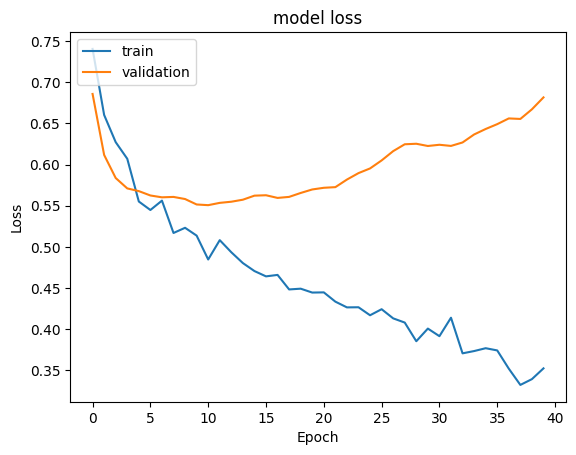

In [163]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

9/9 [==============================] - 0s 2ms/step
Best Threshold=0.290757, G-Mean=0.732


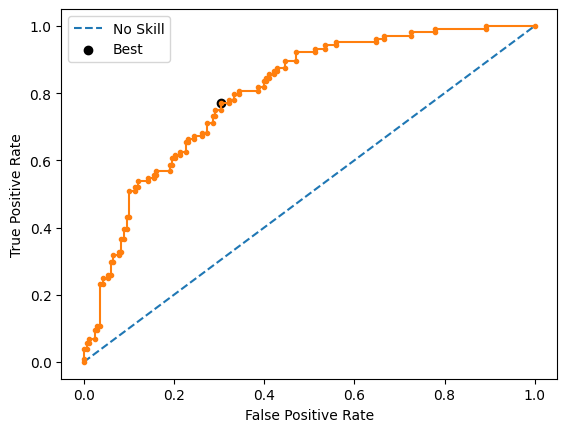

In [164]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [165]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

9/9 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

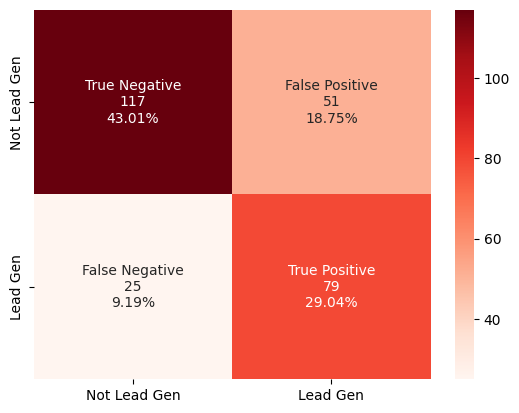

In [168]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Lead Gen','Lead Gen']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [169]:
#Accuracy as per the classification report
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.61      0.76      0.68       104

    accuracy                           0.72       272
   macro avg       0.72      0.73      0.72       272
weighted avg       0.74      0.72      0.72       272

